# 비대면 문화 향유 시설 분포 분석 프로젝트<br><br>
#### - 독립공간 : <span style = 'background : yellow'> 자체적인 거리두기 <span style = 'background : white' >가 가능한 공간으로 <span style = 'background : yellow'> 개별적으로 공간이 분리<span style = 'background : white' >되어있고 <span style = 'background : yellow'> 시설 안에서 자유롭게 사용이 가능<span style = 'background : white' >하다.
    
#### - 오픈공간 : 독립적인 공간은 아니지만 <span style = 'background : white' >규모가 크기 때문에 <span style = 'background : yellow'>거리두기가 수월한 공간<span style = 'background : white' >을 의미한다.<br>
***
## <span style = 'color : blue'> Process<br><br>
    
![process](process.jpg)
    
### 해당 프로젝트의 과정은 위 그림과 같다.<br>
### 각종 데이터를 수집 및 전처리하고 <span style = 'color : red'>MinMaxScaling <span style = 'color : black'>후 더하여<br>각 시군구별로 <span style = 'color : red'>'비대면 문화 향유 지수'<span style = 'color : black'>를 산출하여 우수지역과 위험지역을 <span style = 'color : red'>QGIS<span style = 'color : black'>상에 표시한다.
    


****

## 1. 필요 패키지 불러오기

In [2]:
# 전처리용 패키지
import pandas as pd
import numpy as np
import re

# 시각화용 패키지
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)
%matplotlib inline
from PIL import Image

# 오류 메시지 패키지
import warnings
warnings.filterwarnings("ignore")

# 워드클라우드 패키지
from collections import Counter
from wordcloud import WordCloud

****

## 2. 시기별 WordCloud

코로나 확산 이후 각 월별로 네이버 뉴스 카테고리 중에서 <span style = 'background : lightgreen'>'여행레저', '공연전시'<span style = 'background : white'>의 기사 본문들을 <span style = 'background : lightgreen'>크롤링<span style = 'background : white'>하여 <span style = 'background : lightgreen'>워드클라우드<span style = 'background : white'>를 진행했다.<br>
![naver](naver.jpg)
***
### 2-1. 여행레저

In [3]:
tour1 = pd.read_csv("1월여행.csv", encoding = 'utf-8')
tour2 = pd.read_csv("2월여행.csv", encoding = 'utf-8')
tour3 = pd.read_csv("3월여행.csv", encoding = 'utf-8')
tour4 = pd.read_csv("4월여행.csv", encoding = 'utf-8')
tour5 = pd.read_csv("5월여행.csv", encoding = 'utf-8')
tour6 = pd.read_csv("6월여행.csv", encoding = 'utf-8')
tour7 = pd.read_csv("7월여행.csv", encoding = 'utf-8')
tour8 = pd.read_csv("8월여행.csv", encoding = 'utf-8')
tour9 = pd.read_csv("9월여행.csv", encoding = 'utf-8')

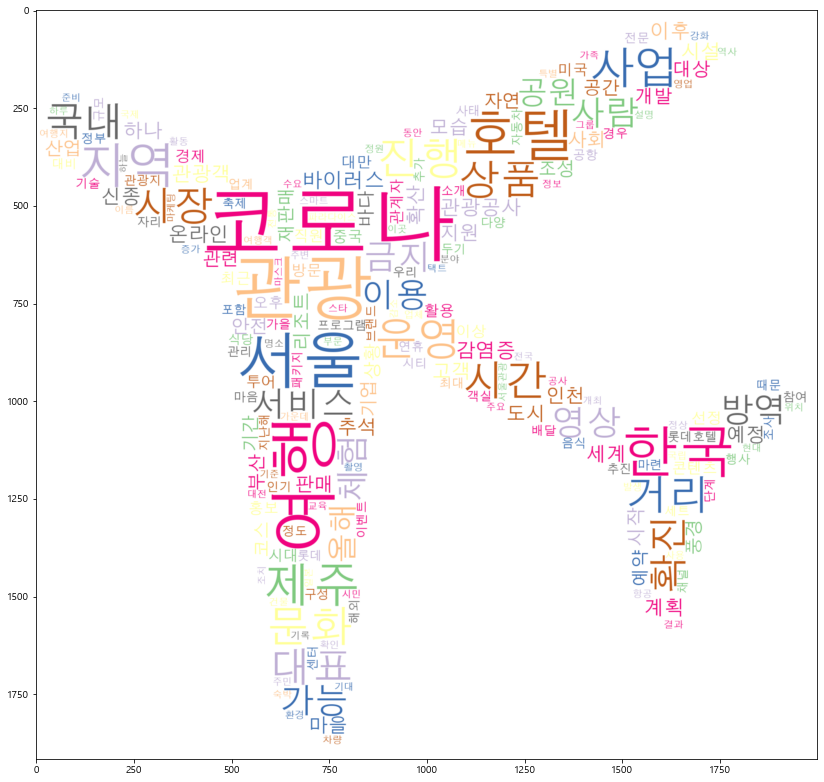

In [4]:
count_word = Counter(tour9.단어)
count_word = dict(count_word.most_common(300))
icon = Image.open('pngwingcom.png')
mask1 = Image.new('RGB', icon.size, (255, 255, 255))
mask1.paste(icon, icon)
mask1 = np.array(mask1)
wordcloud = WordCloud(max_font_size = 500, width = 1200, height = 800, colormap = 'Accent_r', font_path = 'C:/Windows/Fonts/H2GTRM.TTF', background_color = 'white', mask = mask1).generate_from_frequencies(count_word)
plt.figure(figsize = (14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

****

### 2-2.  공연전시

In [5]:
perf1 = pd.read_csv("1월공연.csv", encoding = 'utf-8')
perf2 = pd.read_csv("2월공연.csv", encoding = 'utf-8')
perf3 = pd.read_csv("3월공연.csv", encoding = 'utf-8')
perf4 = pd.read_csv("4월공연.csv", encoding = 'utf-8')
perf5 = pd.read_csv("5월공연.csv", encoding = 'utf-8')
perf6 = pd.read_csv("6월공연.csv", encoding = 'utf-8')
perf7 = pd.read_csv("7월공연.csv", encoding = 'utf-8')
perf8 = pd.read_csv("8월공연.csv", encoding = 'utf-8')
perf9 = pd.read_csv("9월공연.csv", encoding = 'utf-8')

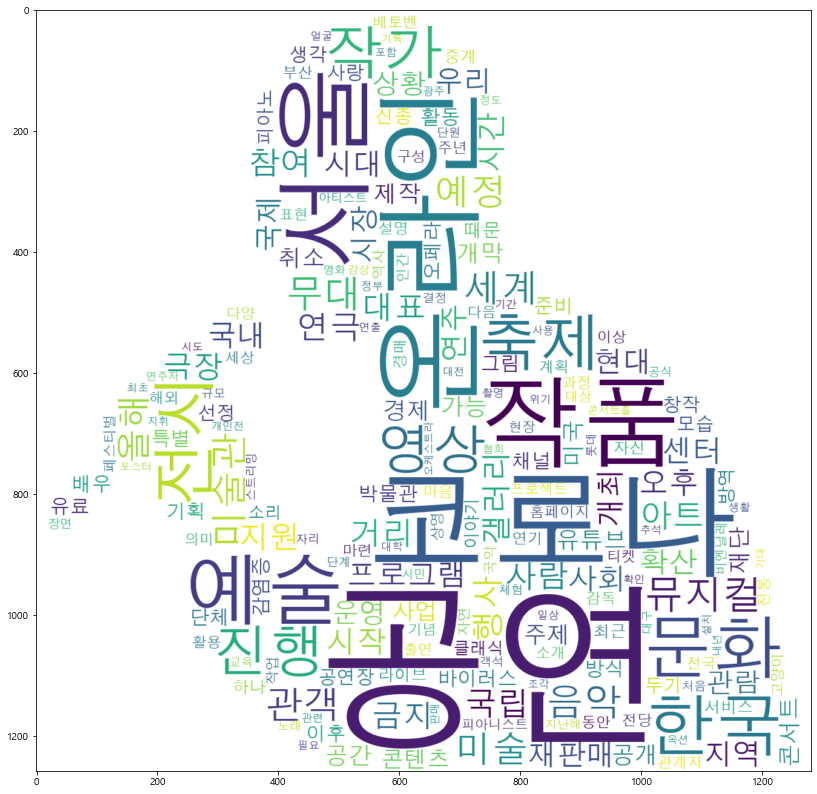

In [6]:
count_word = Counter(perf9.단어)
count_word = dict(count_word.most_common(300))
icon = Image.open('singer-148553_1280.png')
mask1 = Image.new('RGB', icon.size, (255, 255, 255))
mask1.paste(icon, icon)
mask1 = np.array(mask1)
wordcloud = WordCloud(max_font_size = 300, width = 600, height = 800, font_path = 'C:/Windows/Fonts/H2GTRM.TTF', background_color = 'white', mask = mask1).generate_from_frequencies(count_word)
plt.figure(figsize = (14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

***

## 3. Data Wrangling

### 3-1. Tmap Data Analysis

In [7]:
t1 = pd.read_csv("Tmap_2001.csv") # 1월 tmap 데이터
t2 = pd.read_csv("Tmap_2002.csv") # 2월 tmap 데이터
t3 = pd.read_csv("Tmap_2003.csv") # 3월 tmap 데이터
t4 = pd.read_csv("Tmap_2004.csv") # 4월 tmap 데이터
t5 = pd.read_csv("Tmap_2005.csv") # 5월 tmap 데이터
t6 = pd.read_csv("Tmap_2006.csv") # 6월 tmap 데이터
t7 = pd.read_csv("Tmap_2007.csv") # 7월 tmap 데이터
t8 = pd.read_csv("Tmap_2008.csv") # 8월 tmap 데이터
t9 = pd.read_csv("Tmap_2009.csv") # 9월 tmap 데이터
t10 = pd.read_csv("Tmap_2010.csv") # 10월 tmap 데이터

In [8]:
tot = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10], axis = 0, ignore_index = True)

In [9]:
tot.sample(10)

,일자,지역(시도),지역(시군구),검색지명,검색지유형1,검색지유형2,검색지유형3,검색지랭킹(시군구내)
1134387,20200518,경북,안동시,안동성소병원,의료편의,의료시설,종합병원,11
1218743,20200614,충북,단양군,고수동굴,여행/레저,관광명소,동굴,7
140672,20200128,경북,상주시,경북대학교상주캠퍼스,공공편의,교육기관,대학교,5
1570112,20200707,전남,해남군,해남종합버스터미널,교통편의,교통시설,버스터미널,16
786033,20200412,경기,오산시,세교자이아파트,건물/시설,주요건물,아파트브랜드,17
1381042,20200714,경기,김포시,풍경마을래미안한강2차아파트,건물/시설,주요건물,아파트브랜드,6
2168621,20201007,경남,거제시,거가대교,교통편의,교통시설,대교/철교,6
788533,20200429,경남,합천군,덕만주차장,교통편의,자동차시설,주차장,27
2234196,20201012,충남,서산시,서산시청제1청사,공공편의,행정기관,도/시/구/군청,1
284105,20200208,전남,완도군,완도공용버스터미널,교통편의,교통시설,버스터미널,13


In [10]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287476 entries, 0 to 2287475
Data columns (total 8 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   일자           int64 
 1   지역(시도)       object
 2   지역(시군구)      object
 3   검색지명         object
 4   검색지유형1       object
 5   검색지유형2       object
 6   검색지유형3       object
 7   검색지랭킹(시군구내)  int64 
dtypes: int64(2), object(6)
memory usage: 139.6+ MB


In [11]:
tot['일자'] = [str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:] for x in tot.일자]

In [12]:
tot['월'] = tot.일자.str[5:7]

In [13]:
tot['월일'] = tot.일자.str[6:].str.replace('-', '')

In [14]:
def 지역권(x) :
    if x in ['충남','충북','대전','세종'] :
        return '충청권'
    elif x in ['전북','전남', '광주'] :
        return '호남권'
    elif x in ['서울','인천','경기']:
        return '수도권'
    elif x in ['경남','경북','울산','대구','부산']:
        return '영남'
    elif x =='강원' :
        return '강원'
    else :
        return '제주'

In [15]:
tot['지역권'] = tot['지역(시도)'].apply(지역권)

In [16]:
def cat2(x):
    if x in ['관광명소', '자연물', '레저/스포츠', '숙박', '여행/레저기타'] :
        return '여행레저'
    elif x in ['문화생활시설', '취미/오락', '놀거리', '데이트코스'] :
        return '문화관광'
    elif x in ['카페', '음식점', '먹거리', '술집', '맛추천', '음식료', '이색추천'] :
        return '음식'
    elif x in ['대형유통점', '시장', '상설할인매장', '가구', '가방/액세서리', '중고품', '살거리', '의류/직물'] :
        return "쇼핑"
    else :
        return '기타'

In [17]:
tot['검색지유형'] = tot.검색지유형2.apply(cat2)

In [18]:
def for_ratio(x):
    df1 = tot.loc[tot['지역권'] == '{}'.format(x)]
    df1 = df1.query('검색지유형 != "기타"').groupby('일자').월.size().reset_index(name = '문화관광')

    df2 = tot.loc[tot['지역권'] == '{}'.format(x)].groupby('일자').검색지명.size().reset_index(name = '전체유형')

    df3 = pd.concat([df1, df2[['전체유형']]], axis = 1)

    df3[x] = df3.iloc[:, 1] / df3.iloc[:, 2] * 100
    df3.set_index('일자', inplace = True)
    df3 = df3[[x]]

    
    return df3

In [19]:
df = pd.DataFrame(index = tot.일자.unique())
for name in tot['지역권'].unique() :
    df = pd.concat([df, for_ratio(name)], axis = 1)
df.sort_index(inplace=True)    

In [20]:
tot['key'] = tot['지역(시도)'] + tot['지역(시군구)']

In [21]:
def sido(x):
    if x == '충남' :
        return '충청남도'
    elif x == '충북' : 
        return '충청북도'
    elif x == '경북' :
        return '경상북도'
    elif x == '경남':
        return '경상남도'
    elif x == '제주' :
        return '제주도'
    elif x == '서울':
        return '서울특별시'
    elif x == '경기' :
        return '경기도'
    elif x == '전남' :
        return '전라남도'
    elif x == '전북' :
        return '전라북도'
    elif x == '강원' :
        return '강원도'
    elif x == '인천' :
        return '인천광역시'
    elif x == '부산' :
        return '부산광역시'
    elif x == '울산' :
        return '울산광역시'
    elif x == '대구' :
        return '대구광역시'
    elif x == '세종' :
        return '세종특별자치시'
    elif x == '대전':
        return '대전광역시'
    elif x == '광주' :
        return '광주광역시'
    else :
        return x

In [22]:
tot['지역(시도)'] = tot['지역(시도)'].apply(sido)

In [23]:
tot['key'] = tot['지역(시도)'] + ' ' + tot['지역(시군구)']

In [24]:
tot.at[tot.loc[tot.key =='세종특별자치시 .'].index, 'key'] = '세종특별자치시'

In [25]:
f = pd.crosstab(tot['key'], tot.검색지유형).reset_index().drop('기타', axis = 1)

In [26]:
s = f.loc[f.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|창원')]
s['시도명'] = s.key.apply(lambda x : x.split(' ')[1])
s['시군구'] = s.key.apply(lambda x : x.split(' ')[2])

In [27]:
s['key'] = s.시도명 + ' ' + s.시군구

In [28]:
f.loc[s.index] = s

In [29]:
f.at[166, 'key'] = '세종특별자치시'

In [30]:
def over_3(x):
    if x =='경기도 용인시 처인구' :
        return '용인시 처인구'
    elif x =='경기도 용인시 수지구' :
        return '용인시 수지구'
    elif x =='경기도 용인시 기흥구' :
        return '용인시 기흥구'
    elif x =='경기도 성남시 수정구' :
        return '성남시 수정구'
    elif x == '경기도 성남시 중원구' :
        return '성남시 중원구'
    elif x == '경기도 성남시 분당구':
        return '성남시 분당구'
    else :
        return x

In [31]:
f.key = f.key.apply(over_3)

In [32]:
f.loc['250'] = ['인천광역시 미추홀구',0,0,0,0]

In [33]:
df = tot.query('검색지유형 in ["여행레저", "문화관광"]')
df = pd.crosstab(df.월, df.지역권)

In [34]:
df2 = pd.crosstab(tot.월, tot.지역권)

In [35]:
df3 = df / df2 * 100

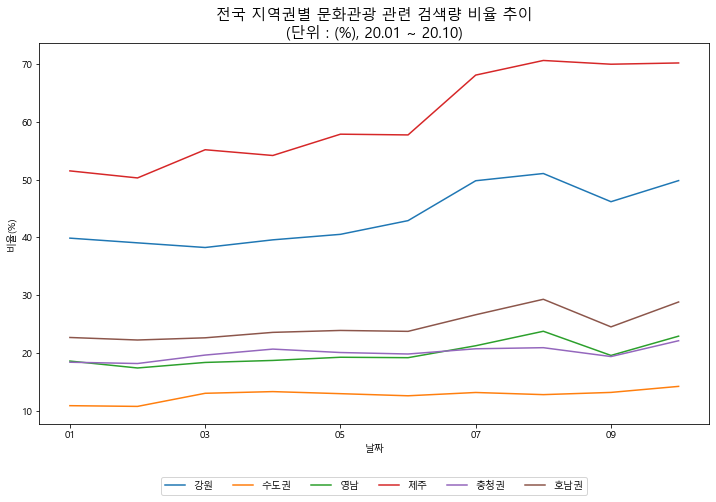

In [36]:
plt.rcParams['figure.figsize'] = (12, 7)
df3.plot()
plt.title('전국 지역권별 문화관광 관련 검색량 비율 추이\n(단위 : (%), 20.01 ~ 20.10)', size = 15)
plt.xlabel('날짜')
plt.ylabel('비율(%)')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 6)
plt.show()

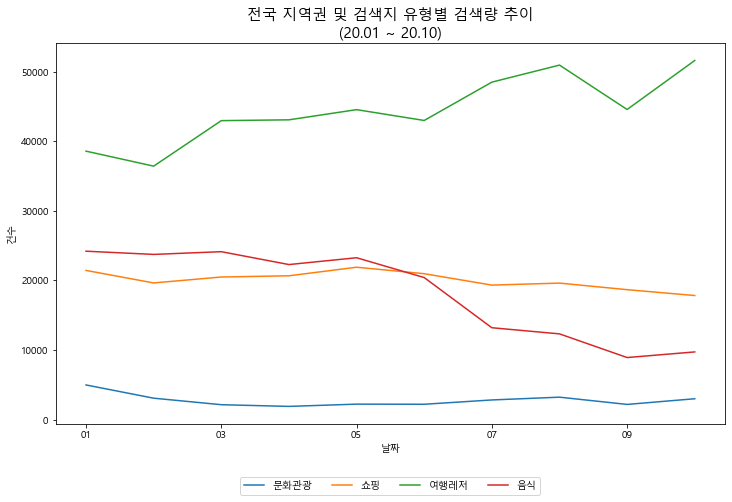

In [37]:
pd.crosstab(tot.월, tot.검색지유형).drop('기타', axis = 1).plot()
plt.title('전국 지역권 및 검색지 유형별 검색량 추이\n(20.01 ~ 20.10)', size = 15)
plt.xlabel('날짜')
plt.ylabel('건수')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol = 4)
plt.show()

In [38]:
tot['검색일자'] = pd.to_datetime(tot.일자)

In [39]:
tot['평일주말'] = tot.검색일자.dt.day_name()

In [40]:
tot.평일주말 = ['주말' if x in ['Saturday', 'Sunday'] else '평일' for x in tot.평일주말]

In [41]:
tot_wd = tot.loc[(tot.평일주말 == '평일') & (tot.검색지유형 == '여행레저')]

****
### 3-2. 전국 캠핑장 표준 데이터

In [42]:
camping = pd.read_csv('전국야영(캠핑)장표준데이터.csv', encoding = 'cp949')

In [43]:
camping.shape

(2261, 42)

In [44]:
camping = camping.iloc[:, 7:16]

In [45]:
c_a = camping[['부지면적']]

In [46]:
camping.drop('부지면적', axis = 1, inplace = True)

In [47]:
camping[['소재지지번주소', '소재지도로명주소']] = camping[['소재지지번주소', '소재지도로명주소']].fillna('없음')

In [48]:
camping['시군구'] = [x.split(' ')[1] if x != '없음' else x for x in camping.소재지도로명주소]
camping['지역1'] = [x.split(' ')[0] if x != '없음' else x for x in camping.소재지도로명주소]

In [49]:
camping.지역1 = ['제주도' if x == '제주특별자치도' else x for x in camping.지역1]

In [50]:
nu = camping.loc[camping.소재지도로명주소 == '없음'][['야영(캠핑)장명','소재지지번주소']]

In [51]:
camping = camping.loc[camping.지역1 != '없음']

In [52]:
nu['시군구'] = [x.split(' ')[1] if x != '없음' else x for x in nu.소재지지번주소]
nu['지역1'] = [x.split(' ')[0] if x != '없음' else x for x in nu.소재지지번주소]

In [53]:
camping = pd.concat([camping, nu], axis = 0, ignore_index = True)

In [54]:
camping['key'] = camping.지역1 + ' ' + camping.시군구

In [55]:
s = camping.loc[camping.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|창원')]
s.지역1 = s.시군구
s.시군구 = s.소재지지번주소.str.split(' ').str[2]
s.key = s.지역1 + ' ' + s.시군구
camping.loc[s.loc[s.key.isnull() == 0].index] = s.loc[s.key.isnull() == 0]

In [56]:
s = s.loc[s.key.isnull() == 1]

In [57]:
s.시군구 = s.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [58]:
s.key = s.지역1 + ' ' + s.시군구

In [59]:
camping.loc[s.index] = s

In [60]:
def ar1(x):
    if x == '창원시' :
        return '경상남도'
    elif x in ['안양시', '안산시', '수원시', '고양시'] :
        return '경기도'
    elif x == '천안시' :
        return '충청남도'
    elif x == '전주시' :
        return '전라북도'
    elif x == '청주시' :
        return '충청북도'
    elif x == '포항시' :
        return '경상북도'
    else :
        return x 

In [61]:
camping['시도명'] = camping.지역1.apply(ar1)

In [62]:
yi = camping.loc[camping.key == '경기도 용인시']
yi.key = yi.소재지도로명주소.str.split(' ').str[1] + ' ' + yi.소재지도로명주소.str.split(' ').str[2]
yi.at[2098, 'key'] = '용인시 처인구'
camping.loc[yi.index] = yi

In [63]:
camping.at[camping.loc[camping.key == '전주시 남노송동'].index , 'key'] = '전주시 완산구'
camping.at[camping.loc[camping.key == '천안시 삼룡동'].index , 'key'] = '천안시 동남구'

***
### 전국 캠핑장(야영장) 위경도 좌표를 매핑하면 아래 그림과 같다.
![캠핑](캠핑장gis.jpg)

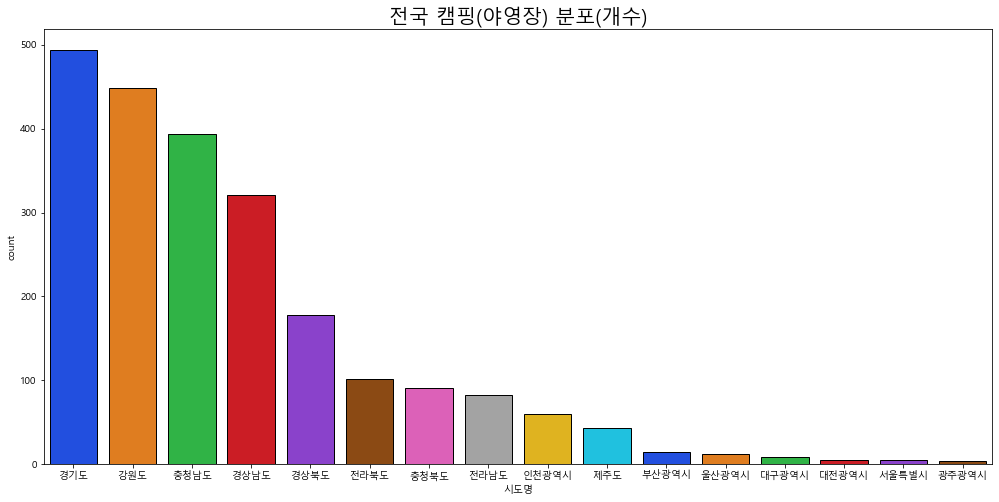

In [64]:
plt.rcParams['figure.figsize'] = (17, 8)
plt.title('전국 캠핑(야영장) 분포(개수)', size = 20)
sns.countplot(camping.시도명, order = camping.시도명.value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [65]:
Top10_key = camping.groupby('key')['야영(캠핑)장명'].size().reset_index(name = '시군구별캠핑장수').sort_values(by = '시군구별캠핑장수', ascending = False)[:10]

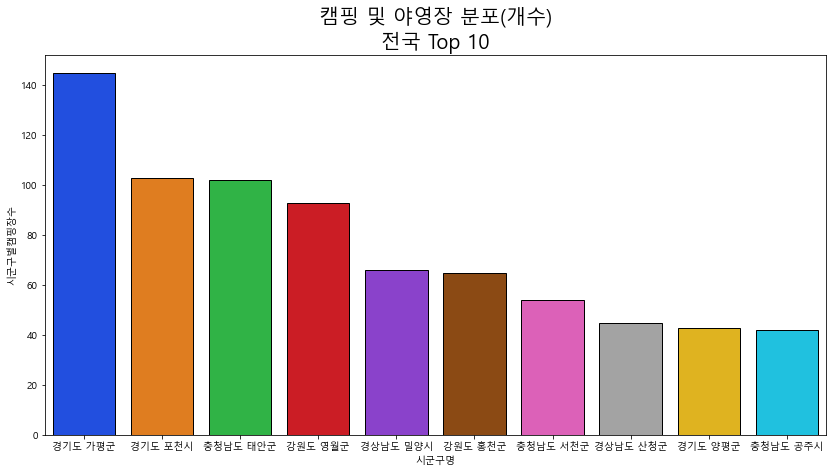

In [66]:
plt.rcParams['figure.figsize'] = (14, 7)
plt.title('캠핑 및 야영장 분포(개수)\n전국 Top 10', size = 20)
sns.barplot(Top10_key['key'], Top10_key.시군구별캠핑장수, order = Top10_key['key'], edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구명')
plt.show()

In [67]:
xy_null = camping.loc[camping.위도.isnull()]
xy_null.to_csv("C:/Users/kcisa/crawling/캠핑장위경도.csv", index = False)

In [68]:
fill = pd.read_csv("캠핑장위경도채움.csv")

In [69]:
camping.loc[camping.loc[camping.위도.isnull()].index, ['위도','경도']] = np.array(fill[['위도','경도']])

In [70]:
camping = pd.concat([camping, c_a], axis = 1)

In [71]:
camping.to_csv('캠핑장데이터.csv', index = False, encoding = 'cp949')

In [72]:
c_a_s = camping.groupby('key')['부지면적', '야영사이트수'].median().reset_index()
c_a_s.head()

,key,부지면적,야영사이트수
0,강원도 강릉시,2755.0,18.5
1,강원도 고성군,13140.0,92.0
2,강원도 동해시,1819.5,20.0
3,강원도 삼척시,3075.0,30.0
4,강원도 양구군,11975.0,17.0


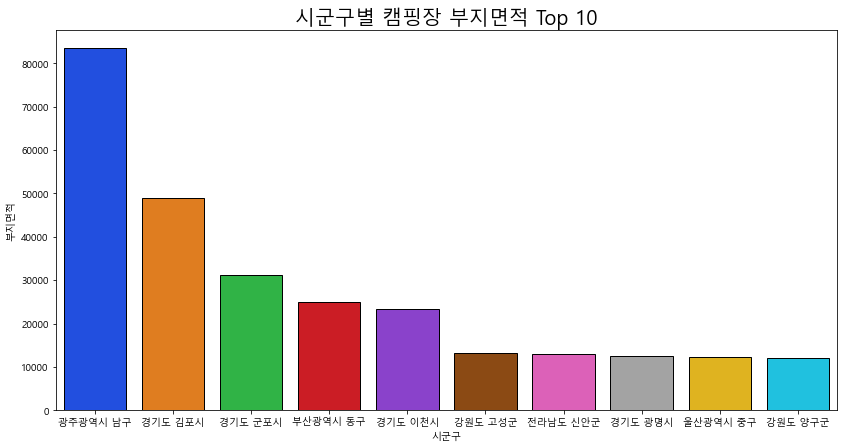

In [73]:
plt.figure(figsize = (14, 7))
k_a = c_a_s.iloc[:, :2].sort_values(by = '부지면적', ascending = False)[:10]
sns.barplot(k_a['key'], k_a.부지면적, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.title('시군구별 캠핑장 부지면적 Top 10', size = 20)
plt.show()

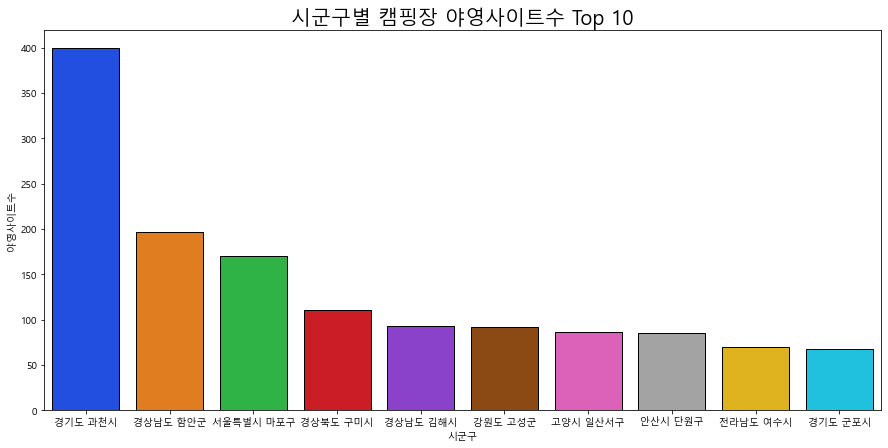

In [74]:
plt.figure(figsize = (15, 7))
k_s = c_a_s.iloc[:, [0,2]].sort_values(by = '야영사이트수', ascending = False)[:10]
sns.barplot(k_s['key'], k_s.야영사이트수, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.title('시군구별 캠핑장 야영사이트수 Top 10', size = 20)
plt.show()

In [75]:
final_camp = camping.groupby("key")['위도','부지면적','야영사이트수'].agg({'위도' : 'size', '부지면적' : 'median', '야영사이트수' : 'median'}).reset_index()
final_camp.columns.name = None
final_camp.index.name = None
final_camp.columns = ['key', '야영장수', '부지면적중위값', '야영사이트수중위값']
final_camp.sample(10)

,key,야영장수,부지면적중위값,야영사이트수중위값
66,경상북도 영주시,7,4208.0,10.0
143,충청남도 금산군,16,3687.0,39.0
106,전라남도 고흥군,6,5343.0,11.5
5,강원도 양양군,28,4654.0,17.5
146,충청남도 보령시,27,3290.5,11.0
14,강원도 홍천군,65,3324.5,10.0
100,울산광역시 중구,2,12367.0,50.0
97,울산광역시 동구,2,9429.0,53.0
28,경기도 양주시,26,2638.0,16.0
104,인천광역시 옹진군,15,2565.0,16.5


In [76]:
f = pd.merge(f, final_camp, how = 'left', on = 'key')

****
### 3-3. 전국 휴양림 표준 데이터

In [77]:
forest = pd.read_csv("전국휴양림표준데이터.csv", encoding = 'cp949')

In [78]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   휴양림명      182 non-null    object 
 1   시도명       182 non-null    object 
 2   휴양림구분     182 non-null    object 
 3   휴양림면적     182 non-null    float64
 4   수용인원수     174 non-null    float64
 5   입장료       182 non-null    object 
 6   숙박가능여부    182 non-null    object 
 7   주요시설명     182 non-null    object 
 8   소재지도로명주소  182 non-null    object 
 9   관리기관명     182 non-null    object 
 10  휴양림전화번호   182 non-null    object 
 11  홈페이지주소    179 non-null    object 
 12  위도        182 non-null    float64
 13  경도        182 non-null    float64
 14  데이터기준일자   182 non-null    object 
 15  제공기관코드    182 non-null    object 
 16  제공기관명     182 non-null    object 
dtypes: float64(4), object(13)
memory usage: 24.3+ KB


In [79]:
forest['시도명'] = ['제주도' if x == '제주특별자치도' else x for x in forest.시도명]

In [80]:
forest['시군구'] = [x.split(' ')[1] if x != '없음' else x for x in forest.소재지도로명주소]

***
### 전국 휴양림 위경도 좌표를 매핑하면 아래 그림과 같다.
![휴양림](휴양림GIS.jpg)

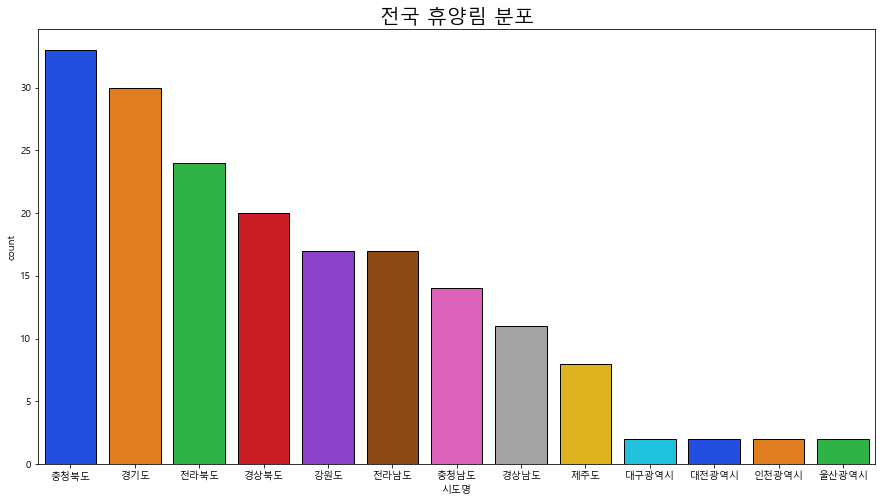

In [81]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('전국 휴양림 분포', size = 20)
sns.countplot(forest.시도명, order = forest.시도명.value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [82]:
forest['key'] = forest.시도명 + ' ' + forest.시군구

In [83]:
s = forest.loc[forest.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|창원')]

In [84]:
s.시도명 = s.시군구

In [85]:
s.시군구 = s.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [86]:
s.key  = s.시도명 + ' ' + s.시군구

In [87]:
forest.loc[s.index] = s

In [88]:
forest.at[forest.loc[forest.key == '경기도 용인시'].index, 'key'] = '용인시 처인구'
forest.at[80, 'key'] = '세종특별자치시'

In [89]:
final_forest = forest.groupby("key")['위도','휴양림면적','수용인원수'].agg({'위도' : 'size', '휴양림면적' : 'median', '수용인원수' : 'median'}).reset_index()
final_forest.columns.name = None
final_forest.index.name = None
final_forest.columns = ['key', '휴양림수', '휴양림면적중위값', '수용인원수중위값']
final_forest.sample(10)

,key,휴양림수,휴양림면적중위값,수용인원수중위값
67,전라남도 여수시,1,2290000.0,100.0
85,청주시 상당구,2,1364921.0,485.0
11,강원도 평창군,1,540000.0,80.0
76,전라북도 부안군,2,46000.0,371.5
26,경상남도 남해군,1,2270000.0,1000.0
53,대전광역시 서구,1,820000.0,6000.0
75,전라북도 무주군,4,150055.0,236.0
77,전라북도 순창군,2,1589500.0,300.0
7,강원도 정선군,1,448966.0,200.0
66,전라남도 신안군,1,302000.0,561.0


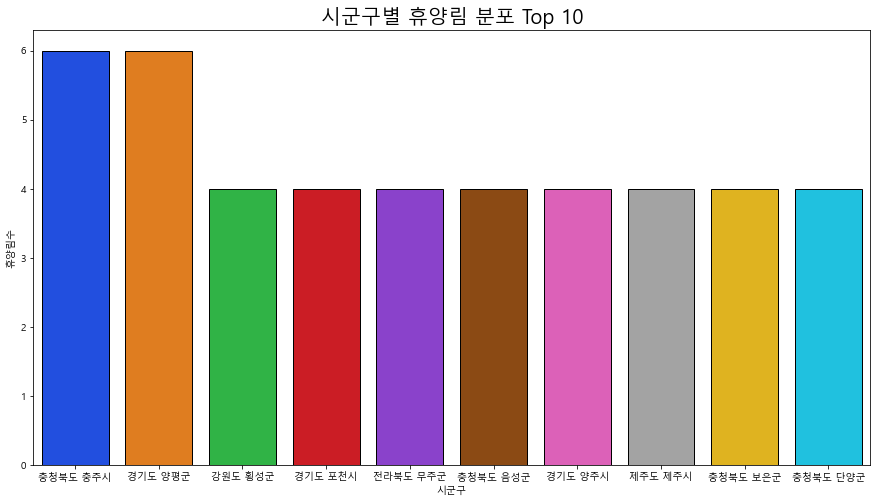

In [90]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 휴양림 분포 Top 10', size = 20)
sns.barplot(final_forest.iloc[:, :2].sort_values(by = '휴양림수', ascending = False)[:10]['key'], final_forest.iloc[:, :2].sort_values(by = '휴양림수', ascending = False)[:10]['휴양림수'], edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

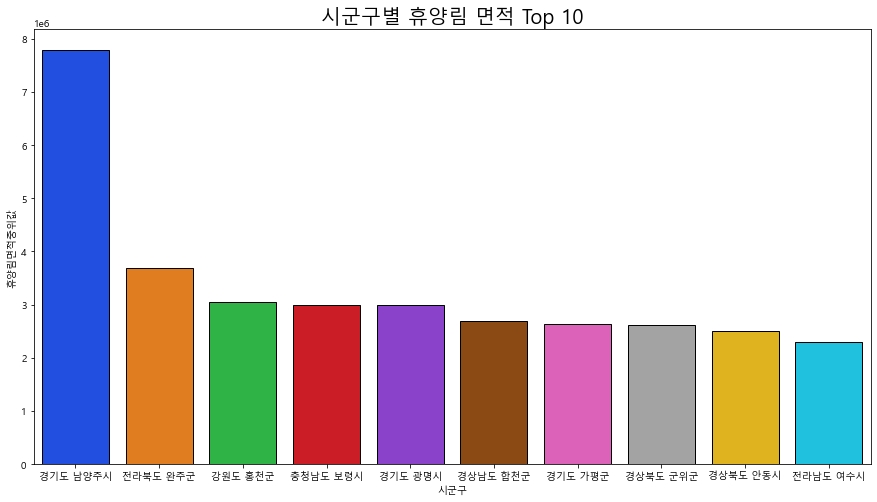

In [91]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 휴양림 면적 Top 10', size = 20)
sns.barplot(final_forest.iloc[:, [0,2]].sort_values(by = '휴양림면적중위값', ascending = False)[:10]['key'], final_forest.iloc[:, [0,2]].sort_values(by = '휴양림면적중위값', ascending = False)[:10]['휴양림면적중위값'], edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

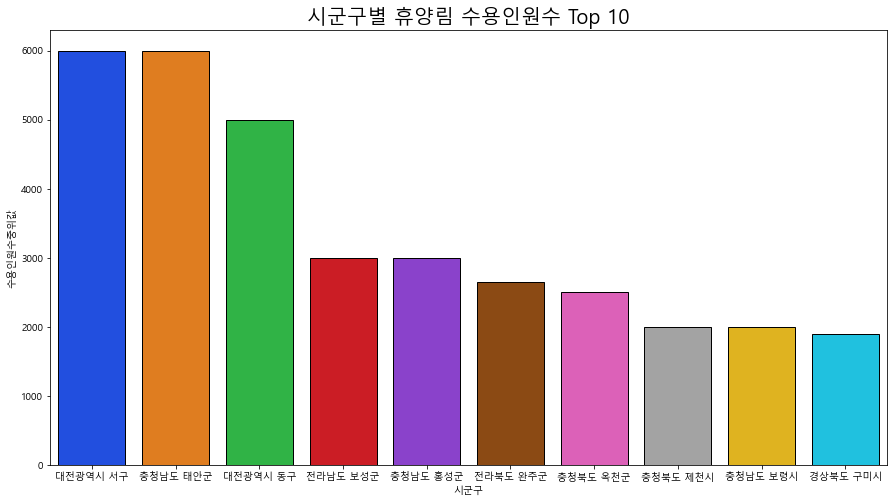

In [92]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 휴양림 수용인원수 Top 10', size = 20)
sns.barplot(final_forest.iloc[:, [0,3]].sort_values(by = '수용인원수중위값', ascending = False)[:10]['key'], final_forest.iloc[:, [0,3]].sort_values(by = '수용인원수중위값', ascending = False)[:10]['수용인원수중위값'], edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

In [93]:
final_forest

,key,휴양림수,휴양림면적중위값,수용인원수중위값
0,강원도 강릉시,1,1160000.00,105.0
1,강원도 삼척시,1,75625.00,175.0
2,강원도 양구군,1,51.00,160.0
3,강원도 양양군,1,43.66,100.0
4,강원도 영월군,1,51.00,4.0
...,...,...,...,...
102,충청북도 제천시,2,1700000.00,2000.0
103,충청북도 증평군,2,730000.00,250.0
104,충청북도 진천군,2,520000.00,144.0
105,충청북도 충주시,6,1740000.00,149.0


In [94]:
f = pd.merge(f, final_forest, how = 'left', on = 'key')

***
### 3-4. 자동차 극장

해당 데이터는 별도로 존재하지 않아 크롤링을 통해서 데이터를 수집하였습니다.

In [95]:
movie = pd.read_csv("자동차극장.csv", encoding = 'cp949')

In [96]:
movie.shape

(21, 6)

In [97]:
movie['시도명'] = movie.주소.apply(lambda x : x.split(' ')[0])

In [98]:
movie['시군구'] = movie.주소.apply(lambda x : x.split(' ')[1])

In [99]:
movie['key'] = movie.시도명 + ' ' + movie.시군구

***
### 전국 자동차극장 위경도 좌표를 QGIS에 매핑하면 아래 그림과 같다.
![자동차](자동차극장_분포.jpg)

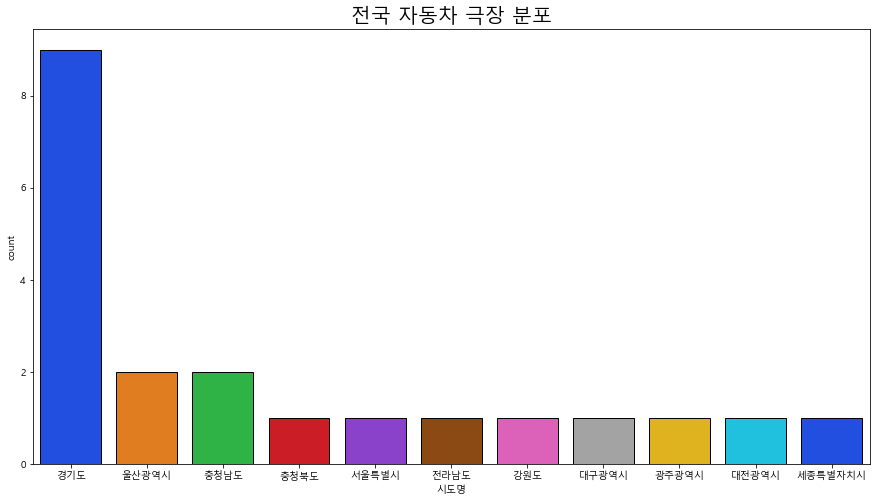

In [100]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('전국 자동차 극장 분포', size = 20)
sns.countplot(movie.시도명, order = movie.시도명.value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [101]:
movie['key'] = movie.시도명 + ' ' + movie.시군구

In [102]:
movie.at[movie.loc[movie.key.str.contains('세종')].index, 'key'] = '세종특별자치시'

In [103]:
movie.at[11, 'key'] = '청주시 흥덕구'

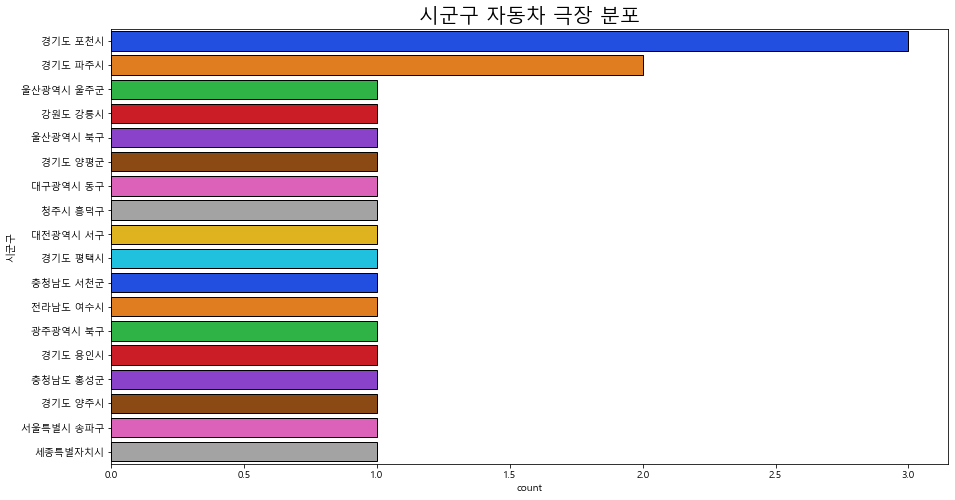

In [104]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구 자동차 극장 분포', size = 20)
sns.countplot(y = movie.key, order = movie.key.value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.ylabel('시군구')
plt.show()

In [105]:
f = pd.merge(f, movie.groupby('key').위도.size().reset_index(name = '자동차극장'), how = 'left', on = 'key')

***
### 3-5. 전국 민박업소

In [106]:
sleep = pd.read_csv("전국민박펜션업소표준데이터.csv", encoding = 'cp949').iloc[:, 13:]

In [107]:
sleep.shape

(27576, 24)

In [108]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27576 entries, 0 to 27575
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업소명       27576 non-null  object 
 1   영문업소명     0 non-null      float64
 2   업종명       27576 non-null  object 
 3   서비스대상구분   27576 non-null  object 
 4   외국어안내서비스  5622 non-null   object 
 5   소재지도로명주소  27368 non-null  object 
 6   소재지지번주소   16414 non-null  object 
 7   소재지우편번호   0 non-null      float64
 8   영문상호주소    0 non-null      float64
 9   전화번호      6658 non-null   object 
 10  총층수       0 non-null      float64
 11  지상층수      0 non-null      float64
 12  지하총수      0 non-null      float64
 13  객실수       27576 non-null  int64  
 14  부대시설      3329 non-null   object 
 15  주차장보유여부   25606 non-null  object 
 16  결제방법      13380 non-null  object 
 17  홈페이지주소    3461 non-null   object 
 18  주변관광정보    4674 non-null   object 
 19  위도        21015 non-null  float64
 20  경도        21015 non-null  fl

In [109]:
sleep[['소재지지번주소', '소재지도로명주소']] = sleep[['소재지지번주소', '소재지도로명주소']].fillna('없음')

In [110]:
sleep['시군구'] = sleep.소재지도로명주소.str.split(' ').str[1]
sleep['시도명'] = sleep.소재지도로명주소.str.split(' ').str[0]

In [111]:
nu = sleep.loc[(sleep.시군구.isnull()) | (sleep.시도명.isnull())]

In [112]:
sleep = sleep.query('index not in @nu.index')

In [113]:
nu['시도명'] = nu.소재지지번주소.str.split(' ').str[0]
nu['시군구'] = nu.소재지지번주소.str.split(' ').str[1]

In [114]:
sleep = pd.concat([sleep, nu], axis = 0, ignore_index = True)

In [115]:
for i in sleep.loc[sleep.시군구.isnull()].index:
    sleep.at[i, '시도명'] = sleep.loc[sleep.시군구.isnull()].제공기관명.unique()[0].split(' ')[0]
    sleep.at[i, '시군구'] = sleep.loc[sleep.시군구.isnull()].제공기관명.unique()[0].split(' ')[1]

In [116]:
sleep.시도명 = ['충청북도' if x == '충북' else x for x in sleep.시도명]

In [117]:
nu = sleep.query('시도명 in ["강원", "강남구", "충북"]')

In [118]:
nu.시도명 = nu.제공기관명.str.split(' ').str[0]
nu.시군구 = nu.제공기관명.str.split(' ').str[1]

In [119]:
sleep.loc[nu.index] = nu

In [120]:
nu = sleep.loc[sleep.시군구.str.endswith('면')]

In [121]:
nu.시도명 = nu.제공기관명.str.split(' ').str[0]
nu.시군구 = nu.제공기관명.str.split(' ').str[1]

In [122]:
sleep.loc[nu.index] = nu

In [123]:
sleep.시도명 = ['제주도' if x == '제주특별자치도' else x for x in sleep.시도명]

***
### 전국 민박업소 펜션 위경도 좌표를 QGIS에 매핑하면 아래 그림과 같다.
![펜션](민박펜션업소_QGIS.jpg)

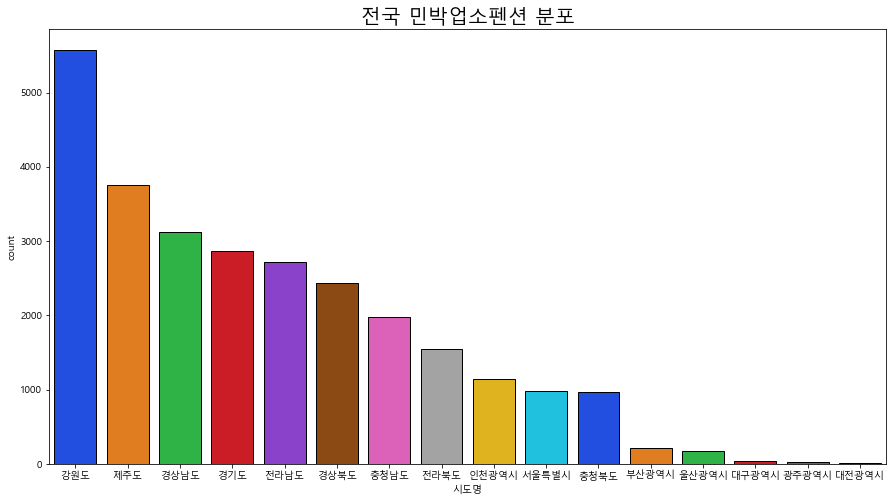

In [124]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('전국 민박업소펜션 분포', size = 20)
sns.countplot(sleep.시도명, order = sleep.시도명.value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [125]:
sleep['key'] = sleep.시도명 + ' ' + sleep.시군구

In [126]:
s = sleep.loc[sleep.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|창원')]
s.시도명 = s.시군구

In [127]:
s.시군구 = s.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [128]:
s.key = s.시도명 + ' ' + s.시군구

In [129]:
sleep.loc[s.index] = s

In [130]:
sleep.at[sleep.loc[sleep.key == '경상남도 거제사'].index, 'key'] = '경상남도 거제시'
sleep.at[sleep.loc[(sleep.key.str.contains('구산면')) | (sleep.key.str.contains('진전면'))].index, 'key'] = '창원시 마산합포구'
sleep.at[sleep.loc[sleep.key == '포항시 북구신광면'].index, 'key'] = '포항시 북구'

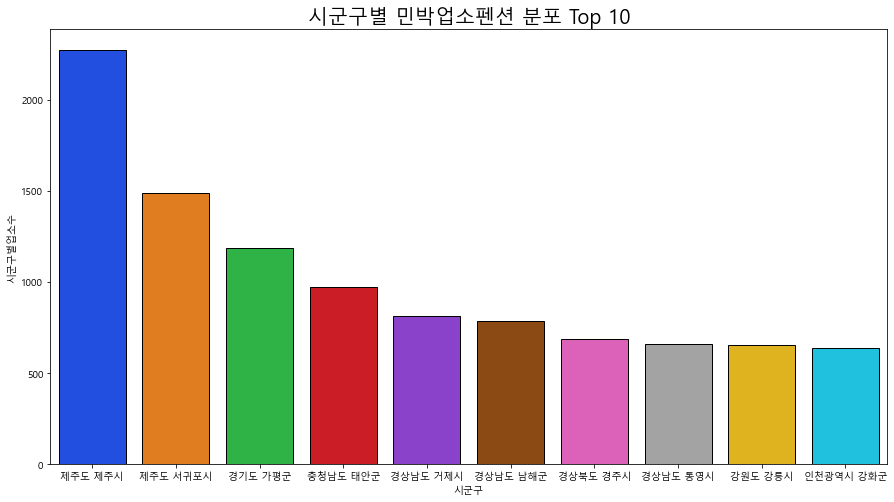

In [131]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 민박업소펜션 분포 Top 10', size = 20)
s_10 = sleep.groupby('key')['시도명'].size().reset_index(name = '시군구별업소수').sort_values(by = '시군구별업소수', ascending = False)[: 10]
sns.barplot(s_10.key, s_10.시군구별업소수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

In [132]:
yi = sleep.loc[sleep.key == '경기도 용인시']
yi.key = yi.소재지도로명주소.str.split(' ' ).str[1] + ' ' + yi.소재지도로명주소.str.split(' ').str[2]
sleep.loc[yi.index] = yi

In [138]:
final_sleep = sleep.groupby('key').객실수.agg([('민박업소펜션수', 'size'), ('객실수중위값', 'median')]).reset_index()
final_sleep.sample(6)

,key,민박업소펜션수,객실수중위값
171,충청남도 논산시,86,3.0
91,서울특별시 강동구,3,1.0
1,강원도 고성군,410,2.0
136,전라남도 신안군,299,3.0
163,천안시 동남구,48,2.0
186,충청북도 진천군,25,2.0


In [139]:
f = pd.merge(f, final_sleep, how = 'left', on = 'key')

***
### 3-6. 전국 박물관 미술관

In [140]:
museum = pd.read_csv("전국박물관미술관정보표준데이터.csv", encoding = 'cp949')

In [141]:
museum.shape

(2221, 26)

In [142]:
museum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시설명        2221 non-null   object 
 1   박물관미술관구분   2221 non-null   object 
 2   소재지도로명주소   2219 non-null   object 
 3   소재지지번주소    681 non-null    object 
 4   위도         2221 non-null   float64
 5   경도         2221 non-null   float64
 6   운영기관전화번호   2221 non-null   object 
 7   운영기관명      2221 non-null   object 
 8   운영홈페이지     995 non-null    object 
 9   편의시설정보     464 non-null    object 
 10  평일관람시작시각   2221 non-null   object 
 11  평일관람종료시각   2221 non-null   object 
 12  공휴일관람시작시각  2221 non-null   object 
 13  공휴일관람종료시각  2221 non-null   object 
 14  휴관정보       2221 non-null   object 
 15  어른관람료      2221 non-null   int64  
 16  청소년관람료     2221 non-null   int64  
 17  어린이관람료     2221 non-null   int64  
 18  관람료기타정보    849 non-null    object 
 19  박물관미술관소개   729 non-null    object 
 20  교통안내정보  

In [143]:
museum.박물관미술관구분.unique()

array(['공립', '사립', '국립', '대학'], dtype=object)

In [144]:
museum = museum[['시설명','박물관미술관구분','소재지도로명주소','소재지지번주소','위도','경도', '제공기관명']]

In [145]:
museum['시도명'] = museum.소재지도로명주소.str.split(' ').str[0]
museum['시군구'] = museum.소재지도로명주소.str.split(' ').str[1]

In [146]:
nu = museum.loc[museum['소재지도로명주소'].isnull()]

In [147]:
nu.시도명 = nu['소재지지번주소'].str.split(' ').str[0]
nu.시군구 = nu['소재지지번주소'].str.split(' ').str[1]

In [148]:
museum.loc[nu.index] = nu

In [149]:
museum['시도명'] = ['제주도' if x == '제주특별자치시' or x == '제주특별자치도' else x for x in museum['시도명']]

In [150]:
nu = museum.loc[(museum['시군구'].str.endswith('로')) | (museum['시군구'].str.endswith('읍')) | (museum['시군구'].str.endswith('면')) | (museum['시군구'].str.endswith('길'))]

In [151]:
nu.at[682, '시군구'] = '양평군'
nu.at[683, '시군구'] = '여주시'
nu.at[857, '시군구'] = '하동군'
nu.at[866, '시군구'] = '여주시'
nu.at[868, '시군구'] = '함양군'
nu.at[1059, '시군구'] = '무주군'
nu.at[1257, '시군구'] = '남구'
nu.at[1297, '시군구'] = '서구'
nu.at[1304, '시군구'] = '연수구'
nu.at[1443, '시군구'] = '음성군'
nu.at[1780, '시군구'] = '홍성군'
nu.at[1785, '시군구'] = '논산시'
nu.at[1849, '시군구'] = '음성군'
nu.at[2102, '시군구'] = '제천시'

In [152]:
museum.loc[nu.index] = nu

In [153]:
museum['key'] =  museum['시도명'] + museum['시군구']

In [154]:
nu = museum.loc[(museum['key'] == '강원도강원도') | (museum['key'] == '경기도경기') | (museum['key'] == '경기도단원구') | (museum['key'] == '경기도상록구') | (museum['key'] == '경기시흥시') | (museum['key'] == '경상남도여주시') | (museum['key'] == '서울특별시서울특별시') | (museum['key'] == '충청북도충북')]

In [155]:
nu.at[675, '시군구'] = '안산시'
nu.at[677, '시군구'] = '안산시'
nu.at[744, '시군구'] = '과천시'
nu.at[747, '시군구'] = '청주시'
nu.at[866, '시군구'] = '하동군'
nu.at[1092, '시군구'] = '중구'
nu.at[1445, '시군구'] = '음성군'
nu.at[1907, '시군구'] = '춘천시'
nu.at[1910, '시군구'] = '춘천시'
nu.at[2062, '시도명'] = '경기도'

In [156]:
museum.loc[nu.index] = nu

In [157]:
nu = museum.loc[museum['시군구'] == '서울']

In [158]:
nu.at[745, '시군구'] = '종로구'
nu.at[746, '시군구'] = '중구'

In [159]:
museum.loc[nu.index] = nu

***
### 박물관 미술관 위경도 좌표를 QGIS에 매핑하면 아래 그림과 같다.
![박물관](박물관미술관_QGIS.jpg)

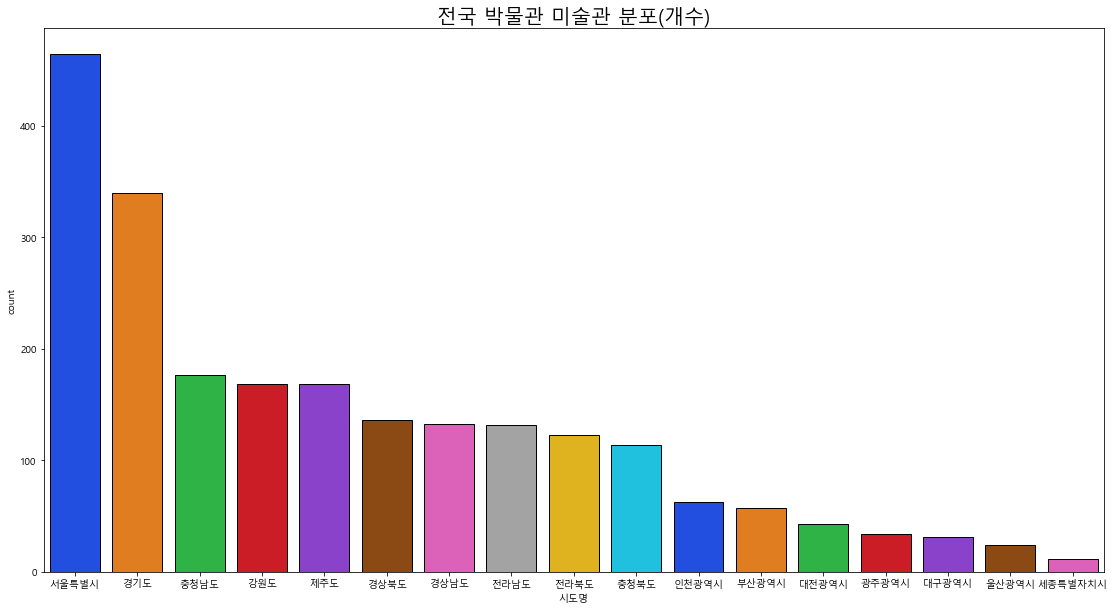

In [160]:
plt.rcParams['figure.figsize'] = (19, 10)
plt.title('전국 박물관 미술관 분포(개수)', size = 20)
sns.countplot(museum['시도명'], order = museum['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [161]:
museum['key'] = museum.시도명 + ' ' + museum.시군구

In [162]:
museum.at[museum.loc[museum.key.str.contains('세종')].index, 'key'] = '세종특별자치시'

In [163]:
s = museum.loc[museum.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|창원')]
s.시도명 = s.시군구

In [164]:
s.시군구 = s.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [165]:
s.key = s.시도명 + ' ' + s.시군구

In [166]:
museum.loc[s.index] = s

In [167]:
sn = museum.loc[museum.key == '경기도 성남시']
sn['key'] = sn.소재지도로명주소.str.split(' ').str[1] + ' ' + sn.소재지도로명주소.str.split(' ').str[2]
museum.loc[sn.index] = sn

In [168]:
yi = museum.loc[museum.key == '경기도 용인시']
yi['key'] = yi.소재지도로명주소.str.split(' ').str[1] + ' ' + yi.소재지도로명주소.str.split(' ').str[2]
museum.loc[yi.index] = yi

In [169]:
museum.at[679, 'key'] = '성남시 분당구'
museum.at[676, 'key'] = '고양시 일산동구'
museum.at[1273, 'key'] = '대구광역시 수성구'
museum.at[675, 'key'] = '안산시 단원구'
museum.at[677, 'key'] = '안산시 상록구'
museum.at[40, 'key'] = '용인시 처인구'
museum.at[museum.loc[museum.key == '제주도 제주도'].index, 'key'] = '제주도 서귀포시'

In [170]:
re_key = museum.query('key in ["용인시 ", "경기도 기흥구", "전주시 한지길"]')

In [171]:
re_key['key'] = re_key.소재지도로명주소.str.split(' ').str[1] + ' ' + re_key.소재지도로명주소.str.split(' ').str[3]

In [172]:
re_key.at[678, 'key'] = '용인시 기흥구'
re_key.at[1070, 'key'] = '전주시 완산구'

In [173]:
museum.loc[re_key.index] = re_key

In [174]:
mu_top10 = museum.groupby('key').위도.size().reset_index(name = '박물관 미술관 개수').sort_values(by = '박물관 미술관 개수', ascending = False)[:10]
mu_top10

,key,박물관 미술관 개수
129,서울특별시 종로구,159
192,제주도 서귀포시,106
193,제주도 제주시,63
109,서울특별시 강남구,35
130,서울특별시 중구,34
36,경기도 파주시,32
127,서울특별시 용산구,32
198,천안시 동남구,30
204,충청남도 공주시,27
30,경기도 여주시,27


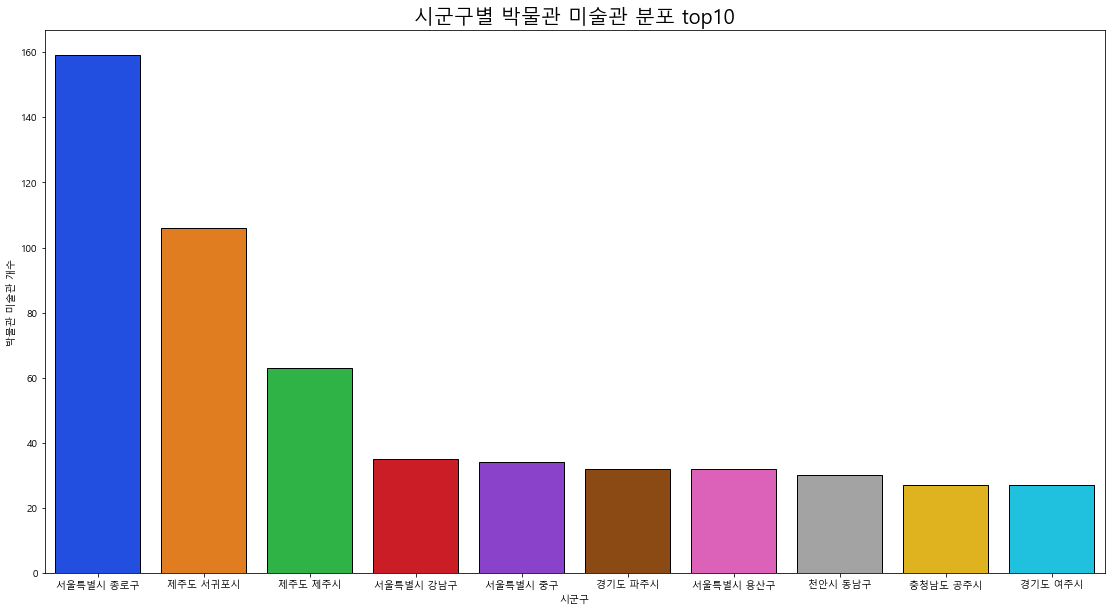

In [175]:
plt.rcParams['figure.figsize'] = (19, 10)
plt.title('시군구별 박물관 미술관 분포 top10', size = 20)
sns.barplot(mu_top10.key, mu_top10['박물관 미술관 개수'], edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

In [176]:
final_museum = pd.crosstab(museum.key, museum.박물관미술관구분).reset_index()
final_museum.columns.name = None

In [177]:
final_museum.sample(7)

,key,공립,국립,대학,사립
45,경상남도 밀양시,2,0,0,4
80,광주광역시 동구,3,2,2,9
33,경기도 의왕시,2,0,1,2
89,대구광역시 중구,4,0,0,0
49,경상남도 의령군,2,0,0,2
193,제주도 제주시,22,2,2,37
36,경기도 파주시,0,1,0,31


In [178]:
f = pd.merge(f, final_museum, how = 'left', on = 'key')

***
### 3-7. 도시공원 데이터

In [179]:
park = pd.read_csv('전국도시공원정보표준데이터.csv', encoding = 'cp949', thousands = ',')

In [180]:
park.shape

(19593, 19)

In [181]:
park = park.query('공원구분 not in ["기타", "묘지공원", "가로공원"]')

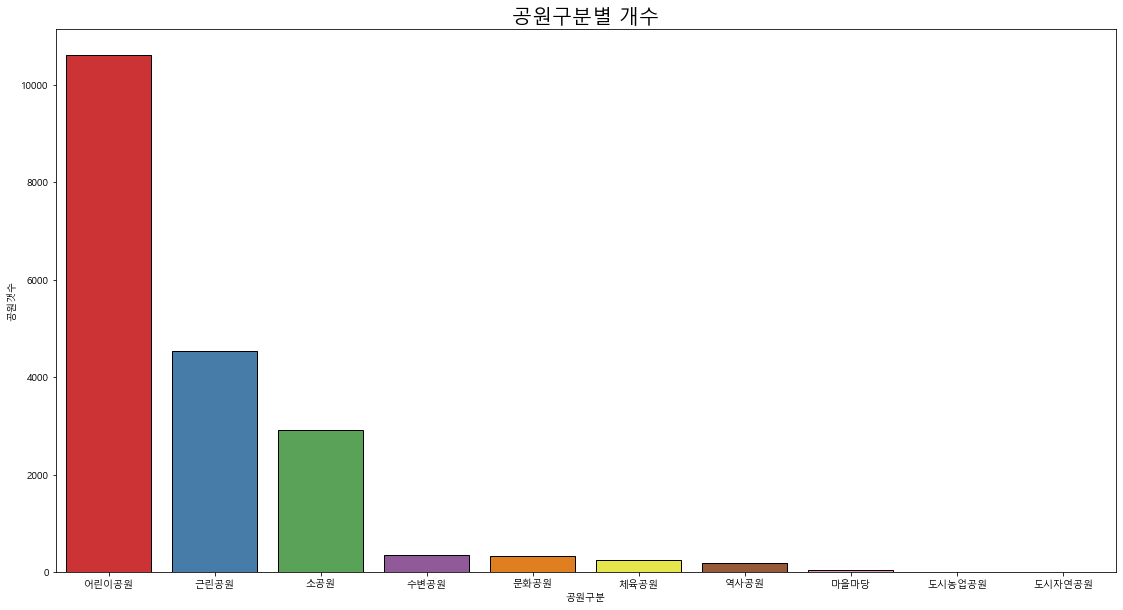

In [182]:
park_cat = park.groupby('공원구분')['위도'].size().reset_index(name = '공원갯수').sort_values(by = '공원갯수', ascending = False)
sns.barplot(park_cat.공원구분, park_cat.공원갯수, edgecolor = (0,0,0), palette = 'Set1')
plt.title('공원구분별 개수', size = 20)
plt.show()

In [183]:
park['key'] = park.제공기관명.apply(lambda x : len(x.split(' ')))

In [184]:
nu = park.loc[park['key'] != 2]
park = park.loc[park['key'] == 2]

In [185]:
park['시도명'] = park.제공기관명.apply(lambda x : x.split(' ')[0])
park['시군구'] = park.제공기관명.apply(lambda x : x.split(' ')[1])

In [186]:
nu.소재지도로명주소 = nu.소재지도로명주소.fillna('없음')
nu.소재지지번주소 = nu.소재지지번주소.fillna('없음')

In [187]:
nu['시도명'] = nu.소재지도로명주소.str.split(' ').str[0]
nu['시군구'] = nu.소재지도로명주소.str.split(' ').str[1]

In [188]:
park = pd.concat([park, nu.loc[nu.시도명 != '없음']], axis = 0, ignore_index = True)

In [189]:
nu = nu.loc[nu.시도명 == '없음']

In [190]:
nu['시도명'] = nu.소재지지번주소.str.split(' ').str[0]
nu['시군구'] = nu.소재지지번주소.str.split(' ').str[1]

In [191]:
park = pd.concat([park, nu], axis = 0, ignore_index = True)

In [192]:
park['시도명'] = ['제주도' if x == '제주특별자치시' or x == '제주특별자치도' else x for x in park['시도명']]

***
### 도시공원 위경도 좌표를 QGIS에 매핑하면 아래 그림과 같다.
![공원](도시공원_QGIS.jpg)

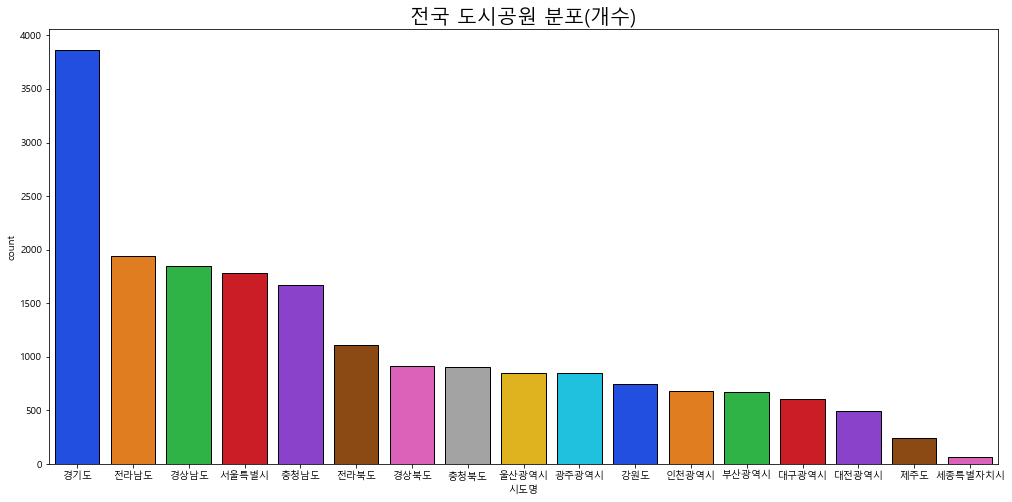

In [193]:
plt.rcParams['figure.figsize'] = (17, 8)
plt.title('전국 도시공원 분포(개수)', size = 20)
sns.countplot(park['시도명'], order = park['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [194]:
park['key'] = park.시도명 + ' ' + park.시군구

In [195]:
park.at[park.loc[park.key.str.contains('세종')].index, 'key'] = '세종특별자치시'

In [196]:
s = park.loc[park.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원')]
s.시도명 = s.시군구

In [197]:
s1 = s.loc[(s.소재지도로명주소.isnull() != 1) & (s.소재지도로명주소 !='없음')]

In [198]:
s1.시군구 = s1.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [199]:
s1.key = s1.시도명 +' '+  s1.시군구

In [200]:
park.loc[s1.index] = s1

In [201]:
s2 = s.query('index not in @s1.index')

In [202]:
s2.시군구 = s2.소재지지번주소.apply(lambda x : x.split(' ')[2])

In [203]:
s2.key = s2.시도명 +' '+  s2.시군구

In [204]:
park.loc[s2.index] = s2

In [205]:
park.at[park.loc[park.key.str.contains('내서읍')].index, 'key'] = '창원시 마산회원구'

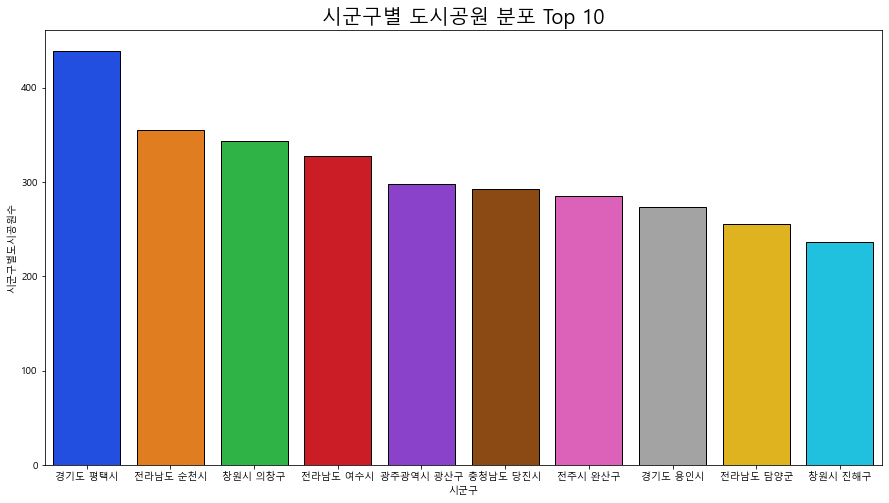

In [206]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 도시공원 분포 Top 10', size = 20)
p_10 = park.groupby('key')['시도명'].size().reset_index(name = '시군구별도시공원수').sort_values(by = '시군구별도시공원수', ascending = False)[: 10]
sns.barplot(p_10.key, p_10.시군구별도시공원수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

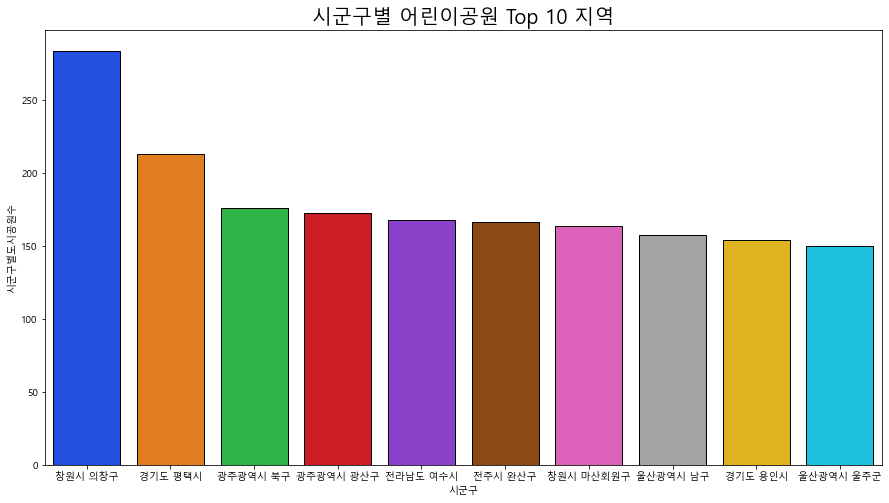

In [207]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 어린이공원 Top 10 지역', size = 20)
p_c_10 = park.loc[park.공원구분 == '어린이공원'].groupby('key')['시도명'].size().reset_index(name = '시군구별도시공원수').sort_values(by = '시군구별도시공원수', ascending = False)[: 10]
sns.barplot(p_c_10.key, p_c_10.시군구별도시공원수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

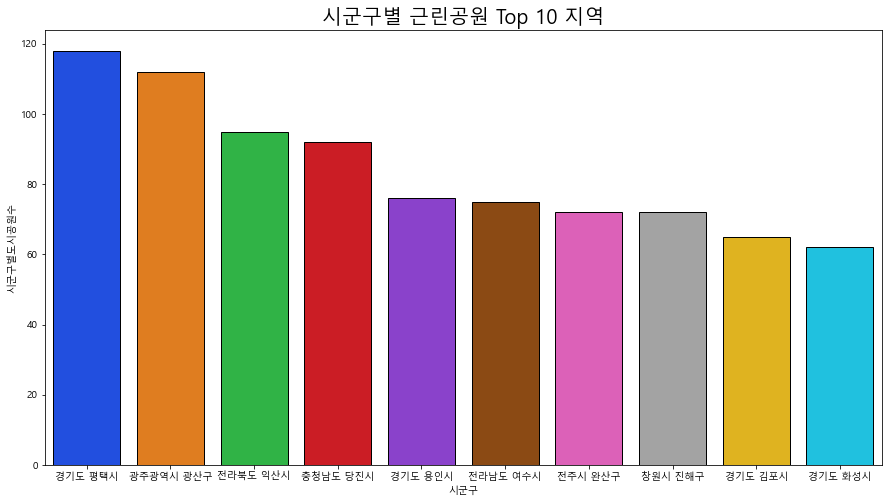

In [208]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 근린공원 Top 10 지역', size = 20)
p_c_10 = park.loc[park.공원구분 == '근린공원'].groupby('key')['시도명'].size().reset_index(name = '시군구별도시공원수').sort_values(by = '시군구별도시공원수', ascending = False)[: 10]
sns.barplot(p_c_10.key, p_c_10.시군구별도시공원수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

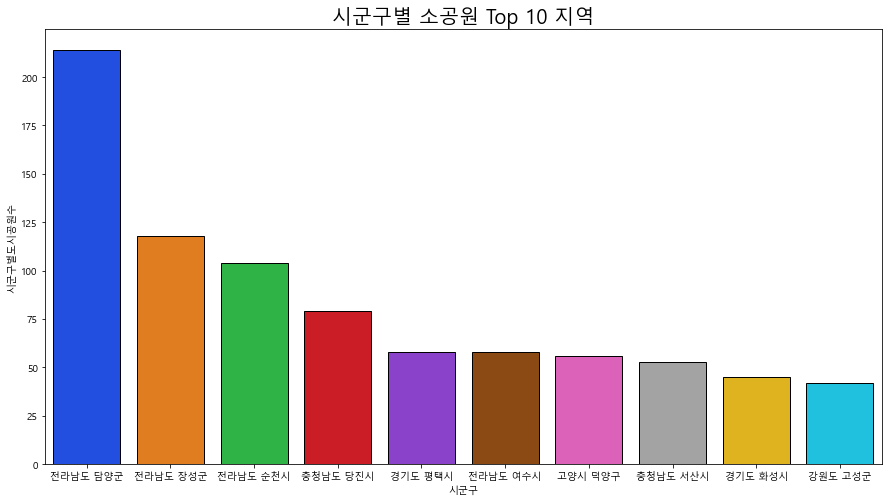

In [209]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 소공원 Top 10 지역', size = 20)
p_c_10 = park.loc[park.공원구분 == '소공원'].groupby('key')['시도명'].size().reset_index(name = '시군구별도시공원수').sort_values(by = '시군구별도시공원수', ascending = False)[: 10]
sns.barplot(p_c_10.key, p_c_10.시군구별도시공원수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

In [210]:
park_count = pd.crosstab(park['key'], park.공원구분)
park_count.columns = [x + '개수' for x in park_count.columns]
park_count = park_count.reset_index()

In [211]:
park_count.sample(5)

,key,근린공원개수,도시농업공원개수,도시자연공원개수,마을마당개수,문화공원개수,소공원개수,수변공원개수,어린이공원개수,역사공원개수,체육공원개수
1,강원도 고성군,1,0,0,0,0,42,0,1,0,1
62,경상북도 경주시,7,0,0,0,1,3,1,44,0,1
63,경상북도 고령군,1,0,0,0,0,0,0,1,0,0
64,경상북도 구미시,22,0,0,0,1,2,2,115,0,1
69,경상북도 상주시,15,0,0,0,3,4,1,24,3,1


In [212]:
park_area = pd.crosstab(park['key'], park.공원구분, aggfunc = 'mean', values = park.공원면적).fillna(0)
park_area.columns = [x + '면적' for x in park_area.columns]
park_area = park_area.reset_index()

In [213]:
park_area.sample(5)

,key,근린공원면적,도시농업공원면적,도시자연공원면적,마을마당면적,문화공원면적,소공원면적,수변공원면적,어린이공원면적,역사공원면적,체육공원면적
119,부산광역시 해운대구,114654.826316,0.0,0.0,0.0,14540.5,2510.520000,304300.0,3002.142857,0.0,0.0
149,수원시 권선구,38727.627778,0.0,0.0,0.0,0.0,754.071429,0.0,2319.773770,0.0,0.0
189,전라남도 진도군,137361.800000,0.0,0.0,0.0,0.0,0.000000,0.0,1800.000000,0.0,0.0
6,강원도 양양군,36751.250000,0.0,0.0,0.0,0.0,0.000000,0.0,2002.400000,0.0,0.0
73,경상북도 영양군,77488.666667,0.0,0.0,0.0,0.0,0.000000,380000.0,0.000000,0.0,0.0


In [214]:
final_park = pd.concat([park_count, park_area.iloc[:, 1:]], axis = 1)

In [215]:
f = pd.merge(f, final_park, how = 'left', on = 'key')

***
### 3-8. 가로수길 데이터

In [216]:
road = pd.read_csv("전국가로수길정보표준데이터.csv", encoding = 'cp949')

In [217]:
road.shape

(7214, 18)

In [218]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가로수길명     7214 non-null   object 
 1   가로수길시작위도  7214 non-null   float64
 2   가로수길시작경도  7214 non-null   float64
 3   가로수길종료위도  7214 non-null   float64
 4   가로수길종료경도  7214 non-null   float64
 5   가로수종류     7214 non-null   object 
 6   가로수수량     6428 non-null   float64
 7   가로수길길이    7214 non-null   float64
 8   식재년도      2747 non-null   float64
 9   가로수길소개    7214 non-null   object 
 10  도로명       5525 non-null   object 
 11  도로종류      3758 non-null   object 
 12  도로구간      7214 non-null   object 
 13  관리기관전화번호  6332 non-null   object 
 14  관리기관명     6489 non-null   object 
 15  데이터기준일자   7214 non-null   object 
 16  제공기관코드    7214 non-null   int64  
 17  제공기관명     7214 non-null   object 
dtypes: float64(7), int64(1), object(10)
memory usage: 1014.6+ KB


In [219]:
road['시도명'] = road.제공기관명.apply(lambda x : x.split(' ')[0])
road['시군구'] = road.제공기관명.apply(lambda x : x.split(' ')[1])

***
### 가로수길 위경도 좌표를 QGIS상에 매핑하면 아래 그림과 같다.
![가로수](가로수길_QGIS.jpg)

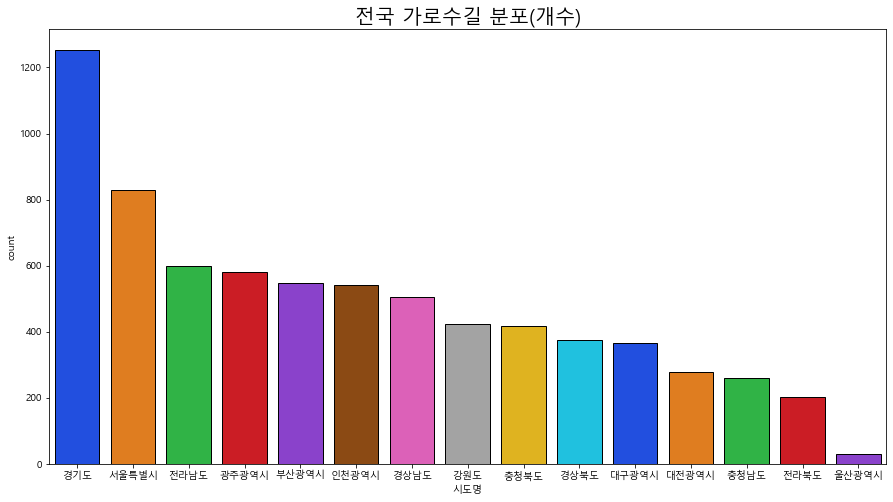

In [220]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('전국 가로수길 분포(개수)', size = 20)
sns.countplot(road['시도명'], order = road['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [221]:
road['key'] = road.시도명 + ' ' + road.시군구

In [222]:
s = road.loc[road.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원')]
s.시도명 = s.시군구

In [223]:
s.to_csv("가로수길key.csv", index = False)

In [224]:
#fill = pd.read_csv("가로수길위경도채움.csv", encoding = 'cp949')

In [225]:
road.loc[s.index] = s

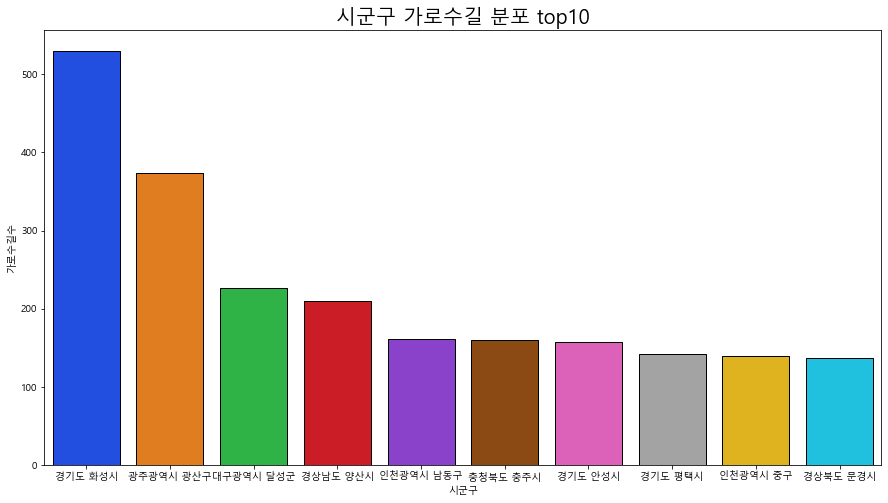

In [226]:
road_top10 = road.groupby('key').가로수종류.size().reset_index(name = '가로수길수').sort_values(by = '가로수길수', ascending  = False)[:10]
plt.title('시군구 가로수길 분포 top10', size = 20)
sns.barplot(road_top10.key, road_top10.가로수길수, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

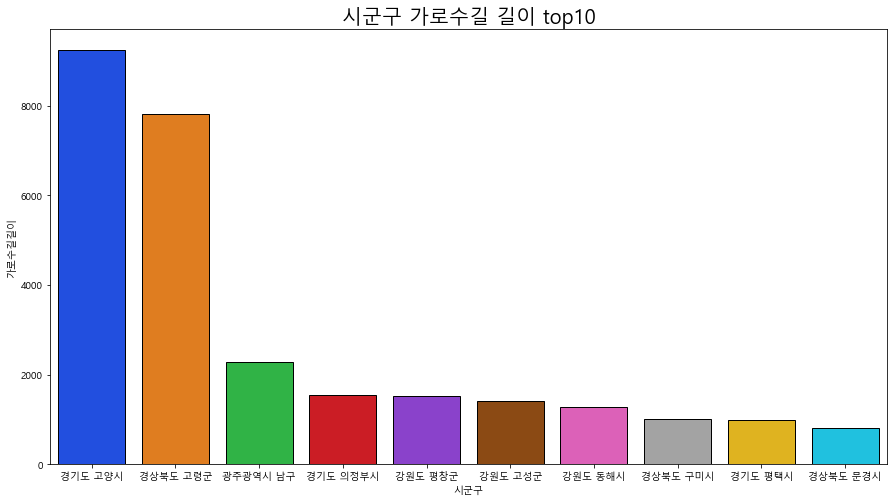

In [227]:
road_length_top10 = road.groupby('key').가로수길길이.median().reset_index(name = '가로수길길이').sort_values(by = '가로수길길이', ascending  = False)[:10]
plt.title('시군구 가로수길 길이 top10', size = 20)
sns.barplot(road_length_top10.key, road_length_top10.가로수길길이, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

In [228]:
final_road = road.groupby("key")['가로수길명','가로수길길이'].agg({'가로수길명' : 'size', '가로수길길이' : 'median'}).reset_index()
final_road.columns.name = None
final_road.index.name = None
final_road.columns = ['key', '가로수길수', '가로수길길이']
final_road.sample(10)

,key,가로수길수,가로수길길이
108,전라남도 곡성군,32,5.60
124,전라북도 고창군,1,10.00
0,강원도 강릉시,35,1.70
35,경상남도 의령군,7,9.50
14,경기도 광주시,28,1.30
46,경상북도 문경시,137,800.00
64,대전광역시 유성구,43,1.10
18,경기도 성남시,65,1.80
62,대전광역시 대덕구,80,1.35
76,부산광역시 수영구,29,315.00


In [229]:
f = pd.merge(f, final_road, how = 'left', on = 'key')

***
### 3-9. 향토 문화 유적 데이터

In [230]:
ht = pd.read_csv("전국향토문화유적표준데이터.csv", encoding = 'cp949')

In [231]:
ht.shape

(3123, 20)

In [232]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   향토문화유적명   3123 non-null   object 
 1   문화유적지정번호  3123 non-null   object 
 2   향토문화유적구분  3123 non-null   object 
 3   향토문화유적종류  3123 non-null   object 
 4   소재지도로명주소  1166 non-null   object 
 5   소재지지번주소   2889 non-null   object 
 6   위도        3123 non-null   float64
 7   경도        3123 non-null   float64
 8   지정일자      3123 non-null   object 
 9   소유주체구분    3123 non-null   object 
 10  소유자명      2175 non-null   object 
 11  규모        1610 non-null   object 
 12  조성시대      1831 non-null   object 
 13  이미지정보     241 non-null    object 
 14  향토문화유적소개  3123 non-null   object 
 15  관리기관전화번호  3123 non-null   object 
 16  관리기관명     3123 non-null   object 
 17  데이터기준일자   3123 non-null   object 
 18  제공기관코드    3123 non-null   int64  
 19  제공기관명     3123 non-null   object 
dtypes: float64(2), int64(1), objec

In [233]:
ht_cat = ht.향토문화유적구분.value_counts().reset_index()
ht_cat

,index,향토문화유적구분
0,유형문화유적,2300
1,기념물,547
2,무형문화유적,147
3,민속자료,129


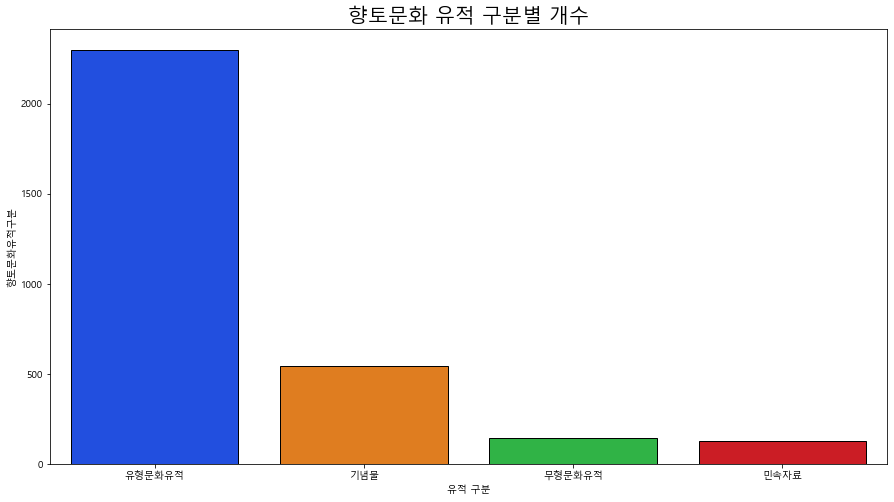

In [234]:
sns.barplot(ht_cat['index'], ht_cat.향토문화유적구분, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('유적 구분')
plt.title('향토문화 유적 구분별 개수', size = 20)
plt.show()

In [235]:
ht_cat = ht.향토문화유적종류.value_counts().reset_index()[:10]
ht_cat

,index,향토문화유적종류
0,건조물,997
1,유형문화유적,152
2,옛무덤,134
3,묘,100
4,기념물,96
5,불상,56
6,조각,52
7,비석,52
8,묘 금석문,43
9,건축물,42


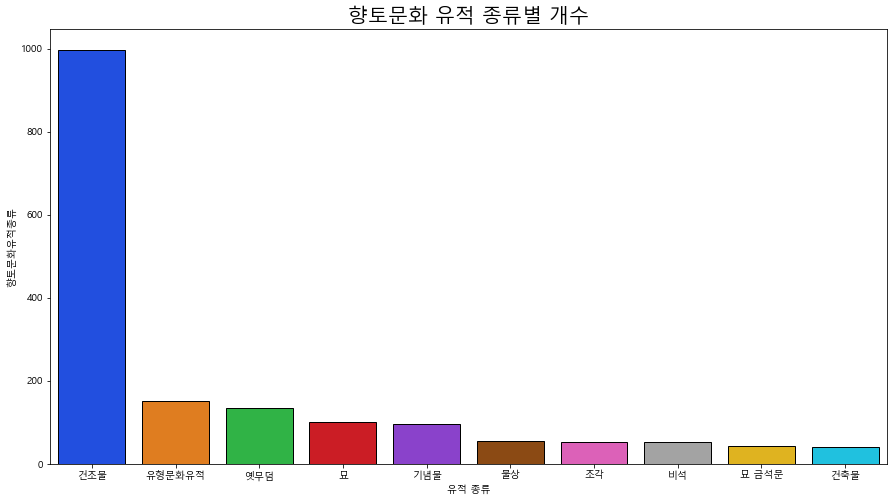

In [236]:
sns.barplot(ht_cat['index'], ht_cat.향토문화유적종류, edgecolor = (0,0,0), palette = 'bright')
plt.xlabel('유적 종류')
plt.title('향토문화 유적 종류별 개수', size = 20)
plt.show()

In [237]:
ht['시도명'] = ht.제공기관명.apply(lambda x : x.split(' ')[0])
ht['시군구'] = ht.제공기관명.apply(lambda x : x.split(' '))

In [238]:
ht['key'] = ht.시군구.apply(lambda x :len(x))

In [239]:
nu = ht.loc[ht['key'] == 1]
ht = ht.loc[ht['key'] != 1]

In [240]:
ht['시군구'] = ht.제공기관명.apply(lambda x : x.split(' ')[1])

In [241]:
nu.소재지도로명주소 = nu.소재지도로명주소.fillna('없음')
nu.소재지지번주소 = nu.소재지지번주소.fillna('없음')

In [242]:
nu2 = nu.loc[nu.소재지도로명주소 == '없음']
nu = nu.loc[nu.소재지도로명주소 != '없음']

In [243]:
nu.시군구 = nu.소재지도로명주소.apply(lambda x : x.split(' ')[1])

In [244]:
nu2.시군구 = nu2.소재지지번주소.apply(lambda x : x.split(' ')[1])

In [245]:
ht = pd.concat([ht, nu, nu2], axis = 0, ignore_index = True)

In [246]:
ht['시도명'] = ['제주도' if x == '제주특별자치시' or x == '제주특별자치도' else x for x in ht['시도명']]

***
### 향토 문화 유적의 위경도 좌표를 QGIS에 매핑하면 아래 그림과 같다.
![향토](향토문화유적_QGIS.jpg)

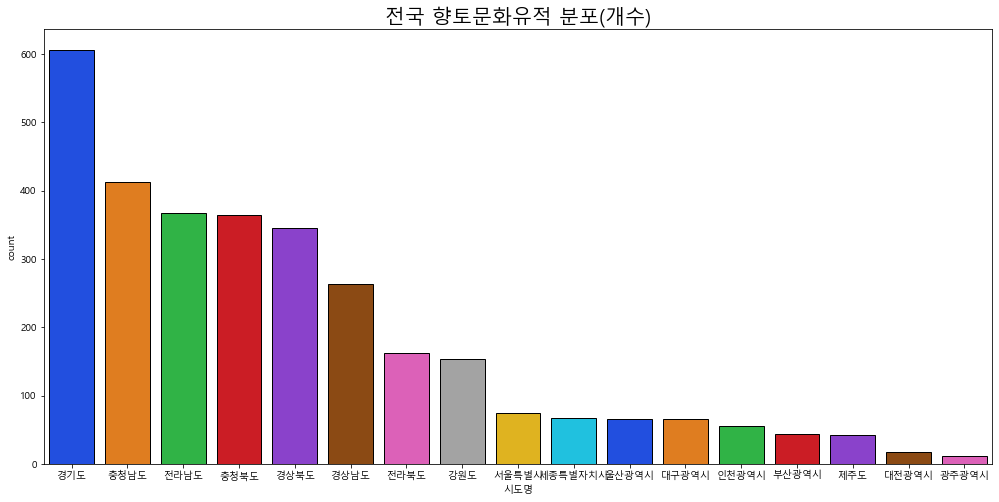

In [247]:
plt.rcParams['figure.figsize'] = (17, 8)
plt.title('전국 향토문화유적 분포(개수)', size = 20)
sns.countplot(ht['시도명'], order = ht['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

In [248]:
ht['key'] = ht.시도명 + ' ' + ht.시군구

In [249]:
ht.at[ht.loc[ht.key.str.contains('세종')].index, 'key'] = '세종특별자치시'

In [250]:
s = ht.loc[ht.key.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원')]
s.시도명 = s.시군구

In [251]:
s1 = s.loc[s.소재지지번주소.isnull() !=1]

In [252]:
s1.시군구 = s1.소재지지번주소.apply(lambda x : x.split(' ')[2])

In [253]:
s1.key = s1.시도명 + ' ' + s1.시군구

In [254]:
ht.loc[s1.index] = s1

In [255]:
s2 = s.query("index not in @s1.index")

In [256]:
s2.시군구 = s2.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [257]:
s2.key = s2.시도명 + ' ' + s2.시군구

In [258]:
ht.loc[s2.index] = s2

In [259]:
ht.at[ht.loc[ht.key == '성남시 동원동'].index, 'key'] = '성남시 분당구'
ht.at[ht.loc[ht.key == '성남시 석운동'].index, 'key'] = '성남시 분당구'

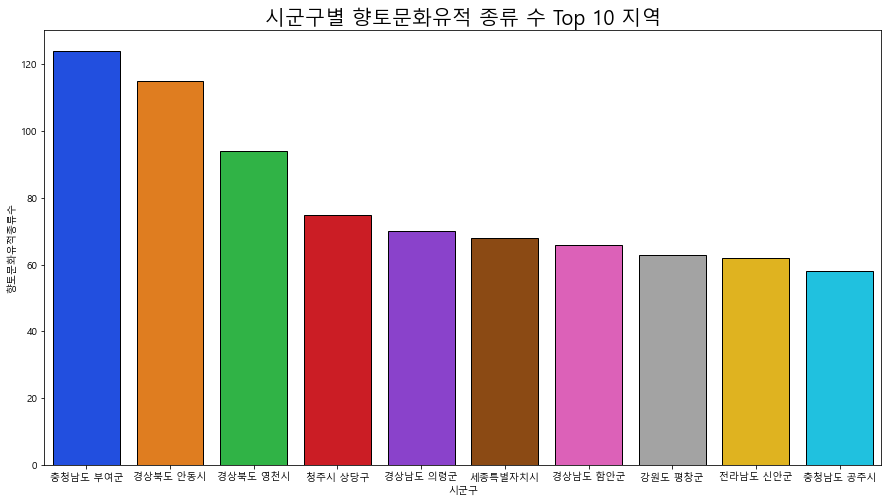

In [260]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.title('시군구별 향토문화유적 종류 수 Top 10 지역', size = 20)
h_c_10 = ht.groupby('key')['향토문화유적종류'].size().reset_index(name = '향토문화유적종류수').sort_values(by = '향토문화유적종류수', ascending = False)[: 10]
sns.barplot(h_c_10.key, h_c_10.향토문화유적종류수, edgecolor = (0,0,0), palette = "bright")
plt.xlabel('시군구')
plt.show()

In [261]:
final_ht = pd.crosstab(ht.key, ht.향토문화유적구분).reset_index()
final_ht.columns.name = None
final_ht.sample(5)

,key,기념물,무형문화유적,민속자료,유형문화유적
137,충청북도 증평군,8,2,0,5
15,경기도 부천시,0,1,0,4
65,성남시 분당구,8,2,0,0
106,전라북도 정읍시,1,0,2,10
75,안양시 동안구,0,0,0,1


In [262]:
f = pd.merge(f, final_ht, how = 'left', on = 'key')

***
### 3-10. 드라이브 스루

해당 데이터는 현재 DT매장을 운영중인 맥도날드, 롯데리아, 스타벅스, 커피빈, 버거킹 등 7개 브랜드를 선정해 크롤링을 통해 데이터를 수집하였다.

In [263]:
dt = pd.read_csv("dt_store_ver_1117.csv", encoding = 'cp949')

In [264]:
dt['시도명'] = dt.도로명주소.str.split(' ').str[0]

In [265]:
dt['key'] = dt.도로명주소.str.split(' ').str[0] + ' ' + dt.도로명주소.str.split(' ').str[1]

In [266]:
dtn = dt.loc[dt.도로명주소.str.contains('수원|안양시|안산|고양|청주|천안|전주|포항|성남|창원')]

In [267]:
dtn['key'] = dt.도로명주소.str.split(' ').str[1] + ' ' + dt.도로명주소.str.split(' ').str[2]

In [268]:
dt.loc[dtn.index] = dtn

In [270]:
dt.at[304,'key'] = '세종특별자치시'
dt.at[319,'key'] = '세종특별자치시'

***
### 드라이브 스루 매장 위경도 좌표를 QGIS 매핑하면 아래 그림과 같다.
![DT](드라이브스루qgis.jpg)

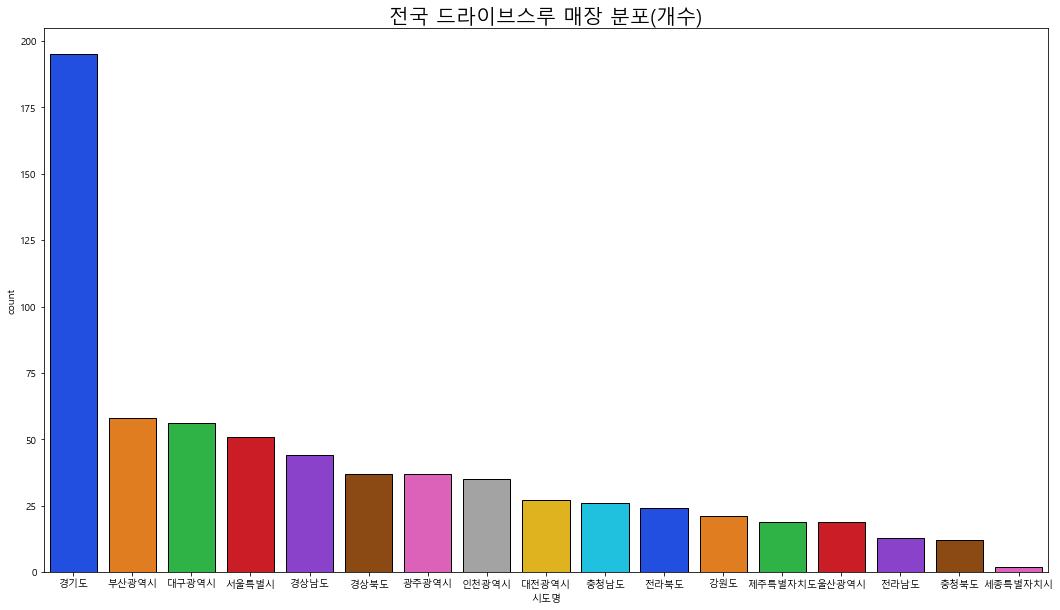

In [271]:
plt.rcParams['figure.figsize'] = (18, 10)
plt.title('전국 드라이브스루 매장 분포(개수)', size = 20)
sns.countplot(dt['시도명'], order = dt['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

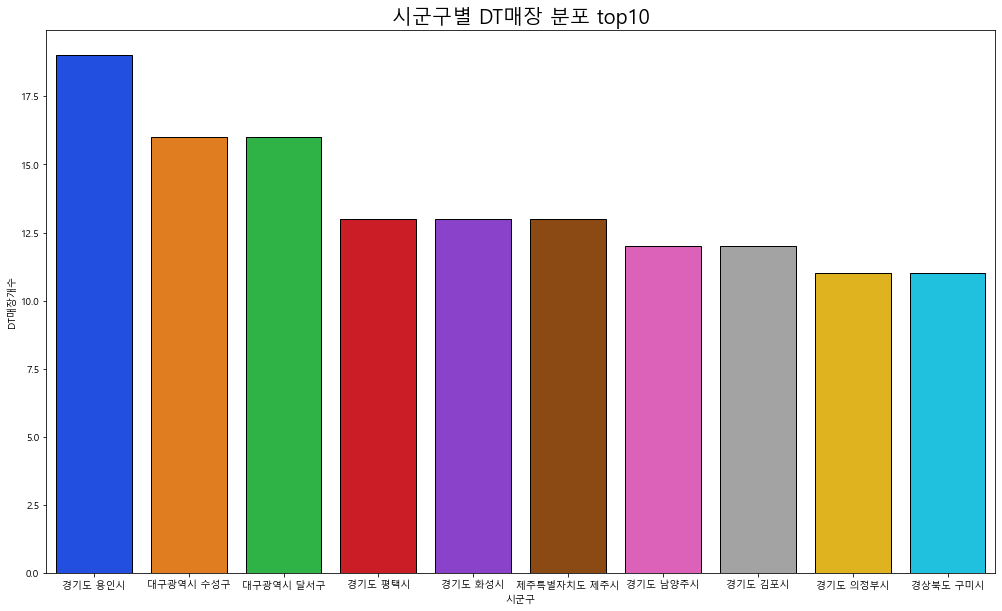

In [272]:
plt.rcParams['figure.figsize'] = (17, 10)
dt_top10 = dt.groupby('key').위도.size().reset_index(name = 'DT매장개수').sort_values(by = 'DT매장개수', ascending = False)[:10]
plt.title('시군구별 DT매장 분포 top10', size = 20)
sns.barplot(dt_top10.key, dt_top10.DT매장개수, edgecolor = (0, 0, 0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

In [273]:
dt.key = dt.key.str.replace('제주특별자치도','제주도')

In [274]:
final_dt = dt.groupby('key')['위도'].size().reset_index(name = '매장개수')

In [275]:
final_dt.sample(4)

,key,매장개수
115,인천광역시 계양구,3
87,서울특별시 노원구,2
57,대구광역시 서구,3
59,대구광역시 중구,2


In [276]:
f = pd.merge(f, final_dt, how = 'left', on = 'key')

****
### 3-11. 관광지 정보

In [277]:
tour = pd.read_csv("전국관광지정보표준데이터.csv", encoding = 'cp949')

In [278]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   관광지명       572 non-null    object 
 1   관광지구분      572 non-null    object 
 2   소재지도로명주소   512 non-null    object 
 3   소재지지번주소    473 non-null    object 
 4   위도         572 non-null    float64
 5   경도         572 non-null    float64
 6   면적         572 non-null    float64
 7   공공편익시설정보   572 non-null    object 
 8   숙박시설정보     296 non-null    object 
 9   운동및오락시설정보  266 non-null    object 
 10  휴양및문화시설정보  321 non-null    object 
 11  접객시설정보     225 non-null    object 
 12  지원시설정보     143 non-null    object 
 13  지정일자       572 non-null    object 
 14  수용인원수      572 non-null    object 
 15  주차가능수      572 non-null    object 
 16  관광지소개      572 non-null    object 
 17  관리기관전화번호   572 non-null    object 
 18  관리기관명      572 non-null    object 
 19  데이터기준일자    572 non-null    object 
 20  제공기관코드    

In [279]:
tour.제공기관명 = [x.replace('제주특별자치도', '제주도') if x.split(' ')[0] == '제주특별자치도' else x for x in tour.제공기관명]

In [280]:
tour['시도명'] = tour.소재지도로명주소.str.split(' ').str[0]

In [281]:
tour1 = tour.loc[tour.제공기관명.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원') != 1]
tour2 = tour.loc[tour.제공기관명.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원') != 0]

In [282]:
tour1['key'] = tour1.제공기관명

In [283]:
tour2['시도명'] = tour2.제공기관명.apply(lambda x : x.split(' ')[1])

In [284]:
tour2['시군구'] = tour2.소재지도로명주소.apply(lambda x : x.split(' ')[2])

In [285]:
tour2['key'] = tour2.시도명 + ' ' + tour2.시군구

In [286]:
tour = pd.concat([tour1, tour2], axis = 0, ignore_index = True)

In [287]:
s = tour.query('key in ["대전광역시", "충청남도"]')

In [288]:
s1 = s.loc[s.소재지도로명주소.isnull()]

In [289]:
s1['시군구'] = s1.소재지지번주소.apply(lambda x : x.split(' ')[1])

In [290]:
s1.key = s1.key + ' ' + s1.시군구

In [291]:
s1.at[257, 'key'] = '천안시 동남구'

In [292]:
s.loc[s1.index] = s1

In [293]:
s2 = s.loc[s.소재지도로명주소.isnull() != 1]

In [294]:
s2['시군구'] = s2.소재지도로명주소.apply(lambda x : x.split(' ')[1])

In [295]:
s2.key = s2.key + ' ' + s2.시군구

In [296]:
s2.at[174, 'key'] = '천안시 동남구'
s2.at[207, 'key'] = '천안시 서북구'

In [297]:
s.loc[s2.index] = s2

In [298]:
tour.loc[s.index] = s

In [299]:
n = tour.loc[tour.제공기관명.str.contains('수원|안양|안산|고양|청주|천안|전주|포항|성남|창원')]
n.제공기관명 = n.소재지도로명주소.str.split(' ').str[1] + ' ' + n.소재지도로명주소.str.split(' ').str[2]
tour.loc[n.index] = n

In [300]:
n = tour.loc[(tour.제공기관명 == '대전광역시') | (tour.제공기관명 == '충청남도')]
n1 = n.loc[n.소재지도로명주소.isnull()]
n1.제공기관명 = n.소재지지번주소.str.split(' ').str[1] + ' ' + n.소재지지번주소.str.split(' ').str[2]
n.loc[n1.index] = n1
n2 = n.loc[n.소재지지번주소.isnull()]
n2.제공기관명 = n.소재지도로명주소.str.split(' ').str[1] + ' ' + n.소재지도로명주소.str.split(' ').str[2]
n.loc[n2.index] = n2

In [301]:
tour.loc[n.index] = n

In [302]:
tour.제공기관명 = tour.제공기관명.str.replace('제주특별자치도', '제주도')

In [304]:
tour.at[tour.loc[tour.시도명 == '천안시'].index, '시도명'] = '충청남도'
tour.at[tour.loc[tour.시도명 == '창원시'].index, '시도명'] = '경상남도'
tour.at[tour.loc[tour.시도명 == '경북'].index, '시도명'] = '경상북도'
tour.at[tour.loc[tour.시도명 == '포항시'].index, '시도명'] = '경상북도'
tour.at[tour.loc[tour.시도명 == '망우로'].index, '시도명'] = '서울특별시'
tour.at[tour.loc[tour.시도명 == '망우로87길'].index, '시도명'] = '서울특별시'
tour.at[tour.loc[tour.시도명 == '용마산로'].index, '시도명'] = '서울특별시'
tour.at[tour.loc[tour.시도명 == '신내로21길'].index, '시도명'] = '서울특별시'

In [305]:
nu = tour.loc[tour.시도명.isnull()]
nu['시도명'] = nu.소재지지번주소.str.split(' ').str[0]
tour.loc[nu.index] = nu

***
### 관광지 위경도 좌표를 매핑하면 아래와 같다.
![관광지](관광지_QGIS.jpg)

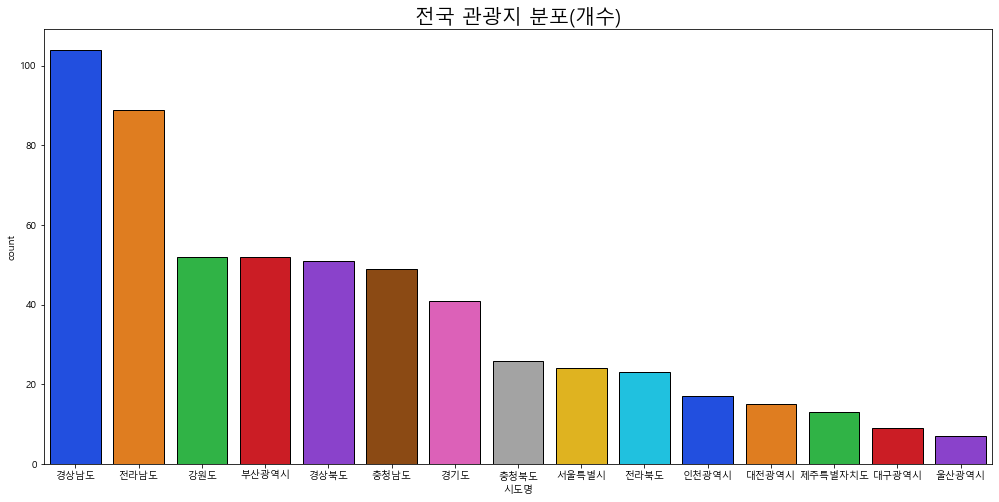

In [306]:
plt.rcParams['figure.figsize'] = (17, 8)
plt.title('전국 관광지 분포(개수)', size = 20)
sns.countplot(tour['시도명'], order = tour['시도명'].value_counts().sort_values(ascending = False).index, edgecolor = (0,0,0), palette = "bright")
plt.show()

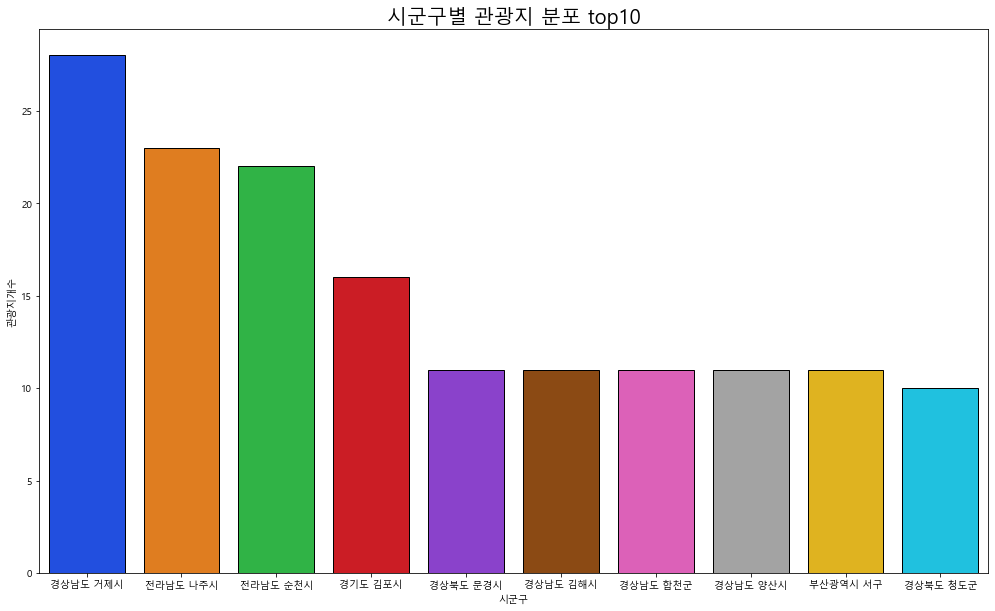

In [307]:
plt.rcParams['figure.figsize'] = (17, 10)
tour_top10 = tour.groupby('key').위도.size().reset_index(name = '관광지개수').sort_values(by = '관광지개수', ascending = False)[:10]
plt.title('시군구별 관광지 분포 top10', size = 20)
sns.barplot(tour_top10.key, tour_top10.관광지개수, edgecolor = (0, 0, 0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

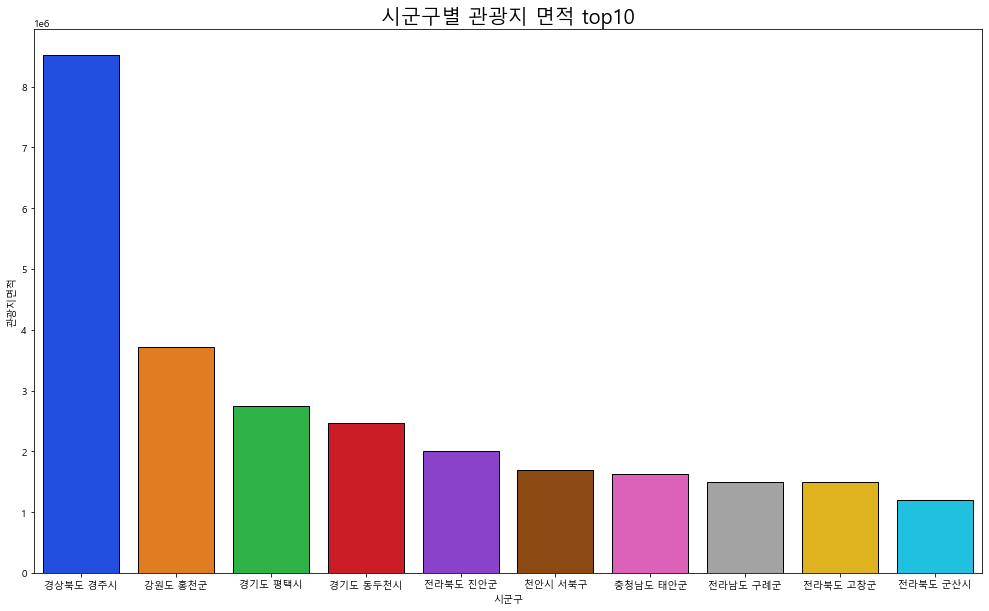

In [308]:
tour_top10 = tour.groupby('key').면적.median().reset_index(name = '관광지면적').sort_values(by = '관광지면적', ascending = False)[:10]
plt.title('시군구별 관광지 면적 top10', size = 20)
sns.barplot(tour_top10.key, tour_top10.관광지면적, edgecolor = (0, 0, 0), palette = 'bright')
plt.xlabel('시군구')
plt.show()

In [309]:
final_tour = tour.groupby("key")['위도','면적'].agg({'위도' : 'size', '면적' : 'median'}).reset_index()
final_tour.columns = ['key', '관광지개수', '관광지면적']
final_tour.sample(10)

,key,관광지개수,관광지면적
104,전라남도 진도군,3,298930.000
4,강원도 속초시,3,228607.000
76,부산광역시 중구,8,0.000
32,경상남도 거제시,28,7559.235
122,천안시 동남구,4,539510.000
125,충청남도 공주시,6,587829.000
29,경기도 평택시,1,2743000.000
117,제주도 서귀포시,7,273538.000
38,경상남도 사천시,1,256877.000
36,경상남도 남해군,1,605283.000


In [310]:
f = pd.merge(f, final_tour, how = 'left', on = 'key')

**** 
### 3-12. 면적

In [311]:
area = pd.read_csv('행정구역_현황_20201008102321.csv', encoding = 'cp949')

In [312]:
area.iloc[:, 0] = ['제주도' if x == '제주특별자치도' else x for x in area.iloc[:, 0]]

In [313]:
area['key'] = area.iloc[:, 0] + ' ' + area.iloc[:, 1]

In [314]:
area.sample(5)

,소재지(시군구)별(1),소재지(시군구)별(2),합계,도시지역,비도시지역,key
117,강원도,정선군,1219777976,433082146,786695830,강원도 정선군
184,전라남도,진도군,440100025,44318191,395781834,전라남도 진도군
147,충청남도,홍성군,446698483,110312847,336385636,충청남도 홍성군
167,전라남도,나주시,608403003,122272253,486130750,전라남도 나주시
168,전라남도,광양시,463087471,134663992,328423479,전라남도 광양시


In [315]:
f = pd.merge(f, area[['key', '도시지역', '비도시지역']], how = 'left', on = 'key')

****
### 3-13. 인구

In [316]:
pop = pd.read_csv('행정구역_시군구_별__성별_인구수_20200929092016.csv', encoding = 'cp949', header = None)
pop.columns = ['행정구역', '인구', 'key']

In [317]:
pop.key = pop.key + " " + pop.행정구역
pop.at[74, 'key'] = '세종특별자치시'

In [318]:
f = pd.merge(f, pop.iloc[:, 1:], how = 'left', on = 'key')

***
## 4. 최종 데이터 통합

In [319]:
df = pd.read_excel('행정동_20200814.xlsx')

In [320]:
df.행정동코드 = df.행정동코드.astype('str').str[:5]

In [321]:
df.시도명 = ['제주도' if x == '제주특별자치도' else x for x in df.시도명]

In [322]:
sj = df.loc[df.시도명.str.contains('세종')]

In [323]:
sj = pd.DataFrame(sj.iloc[1,:2]).T

In [324]:
sj.columns = ['행정동코드','key']

In [325]:
df = df.loc[(df.읍면동명.isnull()) & (df.시군구명.isnull() != 1)]

In [326]:
df['key'] = df.시도명 + ' ' + df.시군구명

In [327]:
df = df[['key', '행정동코드']]

In [328]:
df = pd.concat([df,sj], axis = 0, ignore_index = True)

In [329]:
df.key = df.key.apply(over_3)

In [330]:
d1 = df.loc[df.key.apply(lambda x : len(x.split(' '))) > 2]

In [331]:
d1.key = d1.key.apply(lambda x : x.split(' ')[1]) + ' ' + d1.key.apply(lambda x : x.split(' ')[2])

In [332]:
df.loc[d1.index] = d1

In [333]:
f = pd.merge(f, df, how = 'left', on = 'key')

In [334]:
f.fillna(0, inplace = True)

***
## 5. 비대면 문화 향유 지수 산출

In [335]:
from sklearn.preprocessing import *

In [336]:
scaler = MinMaxScaler()

In [337]:
f.iloc[:, 1:-1] = scaler.fit_transform(f.iloc[:, 1:-1])
f.인구 = -f.인구

In [338]:
f['비대면문화향유지수'] = f.iloc[:, 1:-1].sum(axis = 1)

In [339]:
f.to_csv('비대면result.csv', index = False, encoding = 'cp949')

In [340]:
f.sort_values(by = '비대면문화향유지수')[::-1][:10][['key','비대면문화향유지수']]

,key,비대면문화향유지수
219,제주도 제주시,9.963280
218,제주도 서귀포시,8.605313
193,전라남도 여수시,8.211363
191,전라남도 순천시,7.695361
56,경기도 평택시,7.633349
57,경기도 포천시,7.393970
12,강원도 춘천시,7.209378
45,경기도 양평군,6.414990
83,경상북도 경주시,6.409114
27,경기도 김포시,6.336896


***
### 최종 결과 테이블을 qgis상에 매핑한 결과는 아래 그림과 같다.
![result](최종결과.jpg)
***
## 끝.